# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Difa Fisabilillah
- **Email:** difafisabilillah91@gmail.com
- **ID Dicoding:** MC401D5X0255

# **Study Case :** <br>

*Permasalahan* <br>
↪ Head of Marketing ingin mengetahui cara untuk **meningkatkan  pemasaran berdasarkan tren historis penjualan di platform e-commerce**. Salah satu pendekatan yang dapat digunakan adalah membuat diskon atau bundling produk agar dapat menarik lebih banyak pelanggan dan meningkatkan transaksi. Oleh karena itu, mereka meminta bantuan tim Data Analyst untuk melakukan analisis dan memberikan rekomendasi berdasarkan data historis.

*Tujuan*

1. Menganalisis pola penjualan berdasarkan data historis untuk mengidentifikasi tren pertumbuhan dan kategori produk yang paling diminati.
2. Merekomendasikan strategi pemasaran berbasis data, seperti diskon, bundling, atau personalisasi penawaran, guna meningkatkan loyalitas pelanggan dan volume penjualan.
3. Mengidentifikasi lokasi utama dengan tingkat penjualan tertinggi serta daerah dengan potensi pertumbuhan, guna mengoptimalkan strategi ekspansi dan distribusi.

## Menentukan Pertanyaan Bisnis
1. Kategori apa yang diprediksi akan mengalami peningkatan permintaan dari tahun ketahun?
2. Apakah pemberian voucher kepada pelanggan efektif dalam menarik lebih banyak pelanggan?
3. Apakah terdapat hubungan antara rating pelanggan dan harga produk yang dibeli?
4. Bagaimana tren penjualan di berbagai daerah dari tahun ke tahun, dan daerah mana yang konsisten memiliki penjualan tertinggi?



## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd './drive/MyDrive/dicoding/1. Proyek Analisis Data/E-Commerce Public Dataset'

/content/drive/MyDrive/dicoding/1. Proyek Analisis Data/E-Commerce Public Dataset


In [ ]:
# dataset pelanggan
pelanggan = pd.read_csv('./customers_dataset.csv')

# dataset lokasi
lokasi = pd.read_csv('./geolocation_dataset.csv')

# dataset pesanan
pesanan = pd.read_csv('./order_items_dataset.csv')

# dataset pembayaran
pembayaran = pd.read_csv('./order_payments_dataset.csv')

# dataset ulasan
ulasan = pd.read_csv('./order_reviews_dataset.csv')

# kategori produk dataset
kategori_produk = pd. read_csv('./product_category_name_translation.csv')

# dataset produk
produk = pd.read_csv('./products_dataset.csv')

# dataset penjual
penjual = pd.read_csv('./sellers_dataset.csv')

### Assessing Data

Dilakukan pengecekan tiap data yang telah di-load dengan .info() untuk mengetahui struktur data, termasuk jumlah, tipe data pada setiap kolom, serta apakah terdapat nilai yang hilang (missing values).

In [ ]:
print("info data pelanggan:")
pelanggan.info()
print(f'\nJumlah Duplicate data : {pelanggan.duplicated().sum()}')


info data pelanggan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Jumlah Duplicate data : 0


In [ ]:
print("info data lokasi :")
lokasi.info()

print(f'\nJumlah Duplicate data : {lokasi.duplicated().sum()}')



info data lokasi :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Jumlah Duplicate data : 261831


In [ ]:
print("info data pesanan :")
pesanan.info()

print(f'\nJumlah Duplicate data : {pesanan.duplicated().sum()}')

info data pesanan :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Jumlah Duplicate data : 0


In [ ]:
print("info data pembayaran :")
pembayaran.info()

print(f'\nJumlah Duplicate data : {pembayaran.duplicated().sum()}')

info data pembayaran :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Jumlah Duplicate data : 0


In [ ]:
print("info data ulasan :")
ulasan.info()

print(f'\nJumlah Duplicate data : {ulasan.duplicated().sum()}')

info data ulasan :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

Jumlah Duplicate data : 0


In [ ]:
ulasan.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
print("info data kategori produk :")
kategori_produk.info()

print(f'\nJumlah Duplicate data : {kategori_produk.duplicated().sum()}')

info data kategori produk :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Jumlah Duplicate data : 0


In [ ]:
print("info data produk :")
produk.info()

print(f'\nJumlah Duplicate data : {produk.duplicated().sum()}')

info data produk :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Jumlah Duplicate data : 0


In [ ]:
produk.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
print("info data penjual :")
penjual.info()

print(f'\nJumlah Duplicate data : {penjual.duplicated().sum()}')

info data penjual :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Jumlah Duplicate data : 0


**Insight:**
- Data Pelanggan : <br>
  1. Memiliki 99441 data pelanggan
  2. Tidak memiliki Missing Value
  3. Tidak memiliki Data Duplikat
  4. Data Type yang dimiliki setiap kolom juga sesuai sehingga tidak diperlukan perubahan
- Data Lokasi : <br>
   1. Memiliki 1000163 data lokasi
   2. Tidak Memiliki missing value
   3. Memiliki 261831 duplikat data
   4. Data Type yang dimiliki setiap kolom juga sesuai sehingga tidak diperlukan perubahan
- Data Pesanan
  1. Memiliki 112650 Data pesanan
  2. Tidak memiliki Missing Value
  3. Tidak memiliki Data Duplikat
  4. Kolom shipping_limit_date memiliki tipe data object,  perlu di convert ke bentuk DateTime agar lebih memudahkan dalam proses analisis untuk mengetahui periode dari batas pengiriman pesanan.
- Data Pembayaran
  1. Memiliki 103886 data pembayaran (transaksi)
  2. Tidak memiliki Missing Value
  3. Tidak memiliki Data Duplikat
  4. Data Type yang dimiliki setiap kolom juga sesuai sehingga tidak diperlukan perubahan
- Data ulasan
  1. Memiliki 99224 data ulasan
  2. Memiliki Missing value pada  kolom review_comment_title sebanyak 87656 data dan review_comment_message sebanyak 58247 data
  3. Tidak memiliki data duplikat
  4. Kolom kolom review_creation_date dan review_answer_timestamp  bertipe data object, perlu di convert ke bentuk DateTime agar lebih memudahkan dalam proses analisis untuk mengetahui periode dari batas pengiriman pesanan
- Data kategori produk
  1. Memiliki 71 data kategori produk
  2. Tidak memiliki Missing Value
  3. Tidak memiliki data duplikat
  4. Data Type yang dimiliki setiap kolom juga sesuai sehingga tidak diperlukan perubahan
-Data Produk
  1. Memiliki 32951 data produk
  2. Memiliki Missing value sebanyak 610 data pada kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty, serta missing value sebanyak 2 data pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm
  3. Tidak memiliki data duplikat
  4. Data Type yang dimiliki setiap kolom juga sesuai sehingga tidak diperlukan perubahan
- Data Penjual
  1. Memiliki 3095 data penjual
  2. Tidak memiliki Missing Value
  3. Tidak memiliki data duplikat
  4. Data Type yang dimiliki setiap kolom juga sesuai sehingga tidak diperlukan perubahan
  

  
  
  
  
   

### Cleaning Data

Setelah proses mengenali struktur data dan nilai-nilai di dalamnya, pada tahap **assessing**, dilakukan pembersihan data untuk memastikan bahwa dataset siap digunakan dalam analisis. Pembersihan data ini mencakup **menghapus data duplikat, menangani nilai yang hilang (missing values), mengoreksi inkonsistensi data, serta menormalisasi format data** agar sesuai dengan kebutuhan analisis. Dengan proses ini, data yang digunakan menjadi lebih akurat dan dapat diandalkan untuk mendapatkan jawaban yang valid terhadap permasalahan bisnis.

In [ ]:
# mengubah tipe data pada kolom shipping_limit_date menjadi datetime dan mengambil bulan dan tahunnya
pesanan['month'] = pd.DatetimeIndex(pesanan['shipping_limit_date']).month
pesanan['year'] = pd.DatetimeIndex(pesanan['shipping_limit_date']).year

In [ ]:
produk.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Kolom product_category_name berisi kategori produk, tetapi ditulis dalam bahasa Brasil sehingga sulit dipahami. Oleh karena itu, kategori akan diterjemahkan ke dalam bahasa Inggris agar lebih mudah dimengerti. Untuk itu, perlu dilakukan penggabungan antara tabel data produk dan kategori produk

In [ ]:
data_produk = produk.merge(kategori_produk, on='product_category_name', how='right')

In [ ]:
data_produk.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e3e020af31d4d89d2602272b315c3f6e,beleza_saude,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,health_beauty
1,c5d8079278e912d7e3b6beb48ecb56e8,beleza_saude,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,health_beauty
2,36555a2f528d7b2a255c504191445d39,beleza_saude,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,health_beauty
3,e586ebb6022265ae1eea38f46ffe3ead,beleza_saude,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,health_beauty
4,75b4372e69a42f8ae1d908c076f547b2,beleza_saude,22.0,1313.0,1.0,938.0,29.0,22.0,23.0,health_beauty


kolom product_category_name sudah tidak dibutuhkan lagi karena bisa di ganti dengan kolom product_category_name_english. sehingga kolom yang tidak di butuhkan bisa di hapus

In [ ]:
data_produk.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [ ]:
kolom = [
       'product_name_lenght',
       'product_category_name',
       'product_description_lenght',
       'product_photos_qty',
       'product_weight_g',
       'product_length_cm',
       'product_height_cm',
       'product_width_cm',
       ]
data_produk.drop(columns=kolom, inplace=True)

Untuk memahami tren historis kategori produk yang dibeli pelanggan, perlu dilakukan penggabungan data produk dan pesanan.

In [ ]:
# mengubah nama kolom product_category_name_english agar lebih mudah di baca
data_produk.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

In [ ]:
data_pesanan =  data_produk.merge(pesanan, on='product_id', how='right')

In [ ]:
data_pesanan.head()

,product_id,product_category,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,month,year
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,9,2017
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,5,2017
2,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,2018
3,7634da152a4610f1595efa32f14722fc,perfumery,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,8,2018
4,ac6c3623068f30de03045865e4e10089,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2,2017


Untuk penambahan data ulasan pada tiap produk yang pernah diorder bisa dilakukan penggabungan antara data_pesanan dan ulasan

In [ ]:
# drop bebrapa kolom, karena kolom review_skor sudah cukup menggambarkan kepuasan pelanggan
kolom = ['review_id', 'review_comment_title','review_comment_message','review_answer_timestamp', 'review_creation_date']
ulasan_pelanggan = ulasan.drop(columns= kolom, inplace=True)

In [ ]:
data_pesanan = data_pesanan.merge(ulasan, on='order_id', how='left')
data_pesanan.head()

,product_id,product_category,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,month,year,review_score
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,9,2017,5.0
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,5,2017,4.0
2,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,2018,5.0
3,7634da152a4610f1595efa32f14722fc,perfumery,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,8,2018,4.0
4,ac6c3623068f30de03045865e4e10089,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2,2017,5.0


In [ ]:
data_pesanan.isnull().sum()

,0
product_id,0
product_category,1636
order_id,0
order_item_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
month,0
year,0


Terdapat 2 missing value dalam *data_pesanan*. Karena nama produk dalam data tidak diketahui dan hanya tersedia *product_id*, maka missing value pada kolom *product_category* dapat diisi dengan **"others"**. Sementara itu, missing value pada kolom *review_score* dapat diisi dengan **0**, yang merepresentasikan pelanggan yang tidak memberikan skor ulasan terhadap produk yang dibeli.

In [ ]:
data_pesanan['product_category'] = data_pesanan['product_category'].fillna('others')
data_pesanan['review_score'] = data_pesanan['review_score'].fillna(0)

In [ ]:
# pengecekan missing value
data_pesanan.isnull().sum()

,0
product_id,0
product_category,0
order_id,0
order_item_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
month,0
year,0


In [ ]:
duplikat = data_pesanan[data_pesanan.duplicated(keep=False)]
print(duplikat.shape)
duplikat.head()


(794, 11)


,product_id,product_category,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,month,year,review_score
95,8a6187b2665118d5095f99a25fd7ba7a,bed_bath_table,0035246a40f520710769010f752e7507,1,4a3ca9315b744ce9f8e9374361493884,2017-08-23 01:25:39,87.00,12.11,8,2017,5.0
96,8a6187b2665118d5095f99a25fd7ba7a,bed_bath_table,0035246a40f520710769010f752e7507,1,4a3ca9315b744ce9f8e9374361493884,2017-08-23 01:25:39,87.00,12.11,8,2017,5.0
633,19421075ae0b585f2dc13ff149e2119d,sports_leisure,0176a6846bcb3b0d3aa3116a9a768597,1,4c2b230173bb36f9b240f2b8ac11786e,2018-01-03 04:32:07,45.90,7.78,1,2018,5.0
634,19421075ae0b585f2dc13ff149e2119d,sports_leisure,0176a6846bcb3b0d3aa3116a9a768597,1,4c2b230173bb36f9b240f2b8ac11786e,2018-01-03 04:32:07,45.90,7.78,1,2018,5.0
1241,2028bf1b01cafb2d2b1901fca4083222,perfumery,02e0b68852217f5715fb9cc885829454,1,cc419e0650a3c5ba77189a1882b7556a,2017-12-05 06:31:54,56.99,11.90,12,2017,4.0


Terdapat 794 data duplikat, sehingga perlu di hapus

In [ ]:
data_pesanan.drop_duplicates(inplace=True)

In [ ]:
# cek ulang data duplicat
data_pesanan.duplicated().sum()

0

In [ ]:
data_pesanan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112915 entries, 0 to 113313
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   product_id           112915 non-null  object 
 1   product_category     112915 non-null  object 
 2   order_id             112915 non-null  object 
 3   order_item_id        112915 non-null  int64  
 4   seller_id            112915 non-null  object 
 5   shipping_limit_date  112915 non-null  object 
 6   price                112915 non-null  float64
 7   freight_value        112915 non-null  float64
 8   month                112915 non-null  int32  
 9   year                 112915 non-null  int32  
 10  review_score         112915 non-null  float64
dtypes: float64(3), int32(2), int64(1), object(5)
memory usage: 9.5+ MB


pada kolom month bertipe data int, ini bisa di ubah ke tipe data object atau string untuk lebih mudah dalam pemrosesan data khususnya sebagai fitur kategorikal

In [ ]:
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "Mei", 6: "Jun",
    7: "Jul", 8: "Agu", 9: "Sep", 10: "Okt", 11: "Nov", 12: "Des"
}

# kolom 'month' menjadi nama bulan
data_pesanan["month"] = data_pesanan["month"].map(month_mapping)

# mengurutkan urutkan berdasarkan bulan (numerik)
data_pesanan["month"] = pd.Categorical(data_pesanan["month"],
                                    categories=list(month_mapping.values()),
                                    ordered=True)

In [ ]:
data_pesanan.head()

,product_id,product_category,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,month,year,review_score
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Sep,2017,5.0
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,Mei,2017,4.0
2,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Jan,2018,5.0
3,7634da152a4610f1595efa32f14722fc,perfumery,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,Agu,2018,4.0
4,ac6c3623068f30de03045865e4e10089,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Feb,2017,5.0


Untuk mengetahui proses pembayaran dalam pemesanan produk, dapat dilakukan penggabungan antara data *pesanan* dan data *pembayaran* berdasarkan *order_id*.

In [ ]:
data_pesanan_pembayaran = data_pesanan.merge(pembayaran, on='order_id', how='left')
data_pesanan_pembayaran.head()

,product_id,product_category,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,month,year,review_score,payment_sequential,payment_type,payment_installments,payment_value
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Sep,2017,5.0,1.0,credit_card,2.0,72.19
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,00018f77f2f0320c557190d7a144bdd3,1,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,Mei,2017,4.0,1.0,credit_card,3.0,259.83
2,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,000229ec398224ef6ca0657da4fc703e,1,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Jan,2018,5.0,1.0,credit_card,5.0,216.87
3,7634da152a4610f1595efa32f14722fc,perfumery,00024acbcdf0a6daa1e931b038114c75,1,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,Agu,2018,4.0,1.0,credit_card,2.0,25.78
4,ac6c3623068f30de03045865e4e10089,garden_tools,00042b26cf59d7ce69dfabb4e55b4fd9,1,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Feb,2017,5.0,1.0,credit_card,3.0,218.04


In [ ]:
data_pesanan_pembayaran.to_csv('data_pesanan_Brazilian_E-Commerce.csv', index=False)

Untuk menganalisis persebaran pelanggan dan penjual, dilakukan penggabungan data lokasi dengan data transaksi. Hal ini bertujuan untuk mengetahui distribusi geografis pelanggan dan penjual serta mengidentifikasi wilayah dengan aktivitas e-commerce tertinggi.

In [ ]:
lokasi_pelanggan = pelanggan.merge(lokasi, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [ ]:
lokasi_penjual = penjual.merge(lokasi, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

In [ ]:
# cek Nan Value
lokasi_pelanggan.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
geolocation_zip_code_prefix,278
geolocation_lat,278
geolocation_lng,278
geolocation_city,278
geolocation_state,278


In [ ]:
# drop kolom duplikasi yang mnengandung data yang sama
lokasi_pelanggan.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city','geolocation_state' ], inplace=True)

In [ ]:
# drop Missing Value
lokasi_pelanggan.dropna(inplace=True)
lokasi_pelanggan.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
geolocation_lat,0
geolocation_lng,0


In [ ]:
# cek data duplikat
lokasi_pelanggan.duplicated().sum()

5012091

In [ ]:
# drop data duplikat
lokasi_pelanggan.drop_duplicates(inplace=True)
lokasi_pelanggan.duplicated().sum()

0

Karena *customer_unique_id* merupakan ID unik untuk setiap pelanggan, maka tidak boleh terdapat duplikasi. Oleh karena itu, dilakukan penghapusan data duplikat pada kolom *customer_unique_id* untuk memastikan setiap pelanggan hanya tercatat satu kali dalam analisis.

In [ ]:
lokasi_pelanggan.drop_duplicates(subset='customer_unique_id',inplace=True)

In [ ]:
lokasi_penjual.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0
geolocation_zip_code_prefix,7
geolocation_lat,7
geolocation_lng,7
geolocation_city,7
geolocation_state,7


In [ ]:
lokasi_penjual.drop(columns=['geolocation_zip_code_prefix', 'geolocation_city','geolocation_state'], inplace=True)
lokasi_penjual.dropna(inplace=True)

In [ ]:
lokasi_penjual.duplicated().sum()

131202

In [ ]:
lokasi_penjual.drop_duplicates(inplace=True)

In [ ]:
lokasi_penjual.to_csv('lokasi_penjual.csv', index=False)

In [ ]:
lokasi_pelanggan.to_csv('lokasi_pelanggan.csv', index=False)

Untuk menghindari inkonsistensi dalam penulisan yang disebabkan oleh perbedaan besar-kecil huruf (case sensitivity), dilakukan proses normalisasi dengan mengonversi seluruh teks menjadi huruf kecil (lowercase).

In [ ]:
# Konversi ke lowercase untuk lokasi pelanggan
lokasi_pelanggan[['customer_city', 'customer_state']] = lokasi_pelanggan[['customer_city', 'customer_state']].apply(lambda x: x.str.lower())

# Konversi ke lowercase untuk lokasi penjual
lokasi_penjual[['seller_city', 'seller_state']] = lokasi_penjual[['seller_city', 'seller_state']].apply(lambda x: x.str.lower())


## Exploratory Data Analysis (EDA)

### Explore kolom numerik

In [ ]:
numerik = ['price', 'freight_value', 'review_score', 'payment_sequential','payment_installments','payment_value' ]
data_pesanan_pembayaran[numerik].describe()

,price,freight_value,review_score,payment_sequential,payment_installments,payment_value
count,117891.000000,117891.000000,117891.000000,117888.000000,117888.000000,117888.000000
mean,120.743612,20.040986,3.997175,1.093708,2.941300,172.666694
std,184.304122,15.850145,1.429759,0.726773,2.776437,267.373602
min,0.850000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,39.900000,13.080000,3.000000,1.000000,1.000000,60.860000
50%,74.900000,16.290000,5.000000,1.000000,2.000000,108.210000
75%,134.900000,21.190000,5.000000,1.000000,4.000000,189.330000
max,6735.000000,409.680000,5.000000,29.000000,24.000000,13664.080000


**Insight :**
1. Rata-rata harga produk yang terjual adalah **120.74**. dengan nominal pembelian paling besar adalah **6735.00**
2. Rata-rata biaya ongkir untuk semua pesanan adalah **20.04** dengan biaya ongkir paling besar adalah 409.68
3. rata-rata kepuasan tau rating dari pelanggan terhadap produk yang ia pesan adalah 3.9 dari 5
4. Rata-rata pelanggan melakukan pembayaran dalam 2 kali cicilan

### Explore kolom kategorikal

In [ ]:
data_pesanan_pembayaran['year'].sort_values(ascending=True).unique()

array([2016, 2017, 2018, 2020], dtype=int32)

In [ ]:
kategorikal = ['product_id', 'seller_id', 'product_category', 'month','payment_type']
data_pesanan_pembayaran[kategorikal].describe()

,product_id,seller_id,product_category,month,payment_type
count,117891,117891,117891,117891,117888
unique,32951,3095,72,12,4
top,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,Agu,credit_card
freq,536,2148,11898,14456,86962


**Insight :**
* Periode Tahun <br>
  Tahun pemesanan pada e-commerce tercatat dalam empat tahun, yaitu 2016, 2017, 2018, dan 2020

* Produk
  1. terdapat 117891 produk terjual dari 32951 produk yang tersedia dalam 4 tahun.
  2. produk paling laris adalah produk dengan Id `aca2eb7d00ea1a7b8ebd4e68314663af` yang di pesan sebanyak 536 kali dalam 4 tahun.
* Penjual
  1. terdapat 3095 seller yang berkontribusi dalam 4 tahun
  2. penjual yang paling banyak diminati dalam 4 tahun berdasarkan frekuensi paling banyak muncul adalah seller dengan Id `4a3ca9315b744ce9f8e9374361493884` yang muncul sebanyak 2148 kali
* Produk kategori
  1. Terdapat 72 macam produk kategori
  2. bed_bath_table adalah kategori produk yang paling banyak dibeli dalam 4 tahun yang muncul sebanyak 11898 kali
* Periode Bulan <br>
  Bulan Agustus adalah bulan paling banyak menerima pesanan dalam 4 tahun yang muncul sebanyak 14456 kali
* Tipe Pembayaran <br>
  Terdapat 4 tipe pembayaran dengan pembayaran dengan credit_card paling banyak ynag muncul sebanyak 86962


### Explore periode pesanan dan kategori produk

In [ ]:
# melihat periode tahun
data_pesanan_pembayaran['year'].sort_values(ascending=True).unique()

array([2016, 2017, 2018, 2020], dtype=int32)

In [ ]:
# melihat periode bulan
print(f" 2016 : {data_pesanan_pembayaran[data_pesanan_pembayaran['year']==2016]['month'].unique()}")
print(f" 2017 : {data_pesanan_pembayaran[data_pesanan_pembayaran['year']==2017]['month'].unique()}")
print(f" 2018 : {data_pesanan_pembayaran[data_pesanan_pembayaran['year']==2018]['month'].unique()}")
print(f" 2020 : {data_pesanan_pembayaran[data_pesanan_pembayaran['year']==2020]['month'].unique()}")




 2016 : ['Okt', 'Des', 'Sep']
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Okt' < 'Nov' < 'Des']
 2017 : ['Sep', 'Mei', 'Feb', 'Des', 'Agu', ..., 'Okt', 'Apr', 'Jun', 'Jul', 'Jan']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Okt' < 'Nov' < 'Des']
 2018 : ['Jan', 'Agu', 'Jul', 'Mar', 'Feb', 'Mei', 'Jun', 'Apr', 'Sep']
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Okt' < 'Nov' < 'Des']
 2020 : ['Feb', 'Apr']
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Okt' < 'Nov' < 'Des']


### Explore kategori produk yang paling banyak dipesan berdasarkan bulan

**Insight :**
Tahun pemesanan pada e-commerce tercatat dalam empat tahun, yaitu 2016, 2017, 2018, dan 2020.
1. Pada tahun 2016 : tercatat  pemesanan pada 3 bulan terakhir yaitu bulan september, oktober, dan Desember
2. Pada tahun 2017 : tercatat  pemesanan pada 1 tahun penuh
3. Pada tahun 2018 : tercatat  pemesanan pada hanya  9 bulan yaitu januari - september
4. Pada tahun 2020 : hanya tercatat 2 pemesanan yaitu Februari dan April

In [ ]:
# cek jumlah  kategori produk
data_pesanan_pembayaran['product_category'].nunique()

72

In [ ]:
# buat data tren pesanan berdasarkan tahun, bulan, dan kategori produk
tren_pesanan = data_pesanan.groupby(by=['year','month','product_category'], observed=False)['order_id'].count().sort_values(ascending=False).reset_index()

In [ ]:
# mengubah nama kolom agar lebih mudah dipahami
tren_pesanan.rename(columns={'order_id' : 'total_orders'}, inplace=True)

In [ ]:
#  untuk mengetahui tren pesanan tiap tahunnya
tren_pesanan_2016 = tren_pesanan[tren_pesanan['year']==2016]
tren_pesanan_2017 = tren_pesanan[tren_pesanan['year']==2017]
tren_pesanan_2018 = tren_pesanan[tren_pesanan['year']==2018]
tren_pesanan_2020 = tren_pesanan[tren_pesanan['year']==2020]

In [ ]:
# mencari tren pesanan tiap bulan dalam tahun 2016
tren_pesanan_2016_bulan_9 =  tren_pesanan_2016[tren_pesanan_2016['month'] == 'Sep']
tren_pesanan_2016_bulan_10 =  tren_pesanan_2016[tren_pesanan_2016['month'] == 'Okt']
tren_pesanan_2016_bulan_12 =  tren_pesanan_2016[tren_pesanan_2016['month'] == 'Des']

In [ ]:
print(f'{tren_pesanan_2016_bulan_9.head(3)} \n')
print(f'{tren_pesanan_2016_bulan_10.head(3)} \n')
print(f'{tren_pesanan_2016_bulan_12.head(3)}')

      year month  product_category  total_orders
1090  2016   Sep     health_beauty             3
1244  2016   Sep         telephony             1
3185  2016   Sep  small_appliances             0 

     year month product_category  total_orders
365  2016   Okt  furniture_decor            69
429  2016   Okt    health_beauty            48
500  2016   Okt        perfumery            33 

      year month          product_category  total_orders
1264  2016   Des  fashion_bags_accessories             1
2920  2016   Des     security_and_services             0
3004  2016   Des             watches_gifts             0


In [ ]:
# mencari tren pesanan tiap bulan dalam tahun 2017
tren_pesanan_2017_bulan_1 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Jan']
tren_pesanan_2017_bulan_2 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Feb']
tren_pesanan_2017_bulan_3 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Mar']
tren_pesanan_2017_bulan_4 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Apr']
tren_pesanan_2017_bulan_5 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Mei']
tren_pesanan_2017_bulan_6 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Jun']
tren_pesanan_2017_bulan_7 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Jul']
tren_pesanan_2017_bulan_8 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Agu']
tren_pesanan_2017_bulan_9 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Sep']
tren_pesanan_2017_bulan_10 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Okt']
tren_pesanan_2017_bulan_11 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Nov']
tren_pesanan_2017_bulan_12 =  tren_pesanan_2017[tren_pesanan_2017['month'] == 'Des']

In [ ]:
print(f'{tren_pesanan_2017_bulan_1.head(3)} \n')
print(f'{tren_pesanan_2017_bulan_2.head(3)} \n')
print(f'{tren_pesanan_2017_bulan_3.head(3)} \n ')
print(f'{tren_pesanan_2017_bulan_4.head(3)} \n')
print(f'{tren_pesanan_2017_bulan_5.head(3)} \n')
print(f'{tren_pesanan_2017_bulan_6.head(3)} \n')
print(f'{tren_pesanan_2017_bulan_7.head(3)} \n')
print(f'{tren_pesanan_2017_bulan_8.head(3)} \n')
print(f'{tren_pesanan_2017_bulan_9.head(3)}\n')
print(f'{tren_pesanan_2017_bulan_10.head(3)} \n')
print(f'{tren_pesanan_2017_bulan_11.head(3)} \n')
print(f'{tren_pesanan_2017_bulan_12.head(3)}')


     year month product_category  total_orders
246  2017   Jan  furniture_decor           148
391  2017   Jan    health_beauty            60
393  2017   Jan   sports_leisure            58 

     year month product_category  total_orders
172  2017   Feb  furniture_decor           226
214  2017   Feb    health_beauty           175
242  2017   Feb   sports_leisure           150 

     year month product_category  total_orders
84   2017   Mar  furniture_decor           364
153  2017   Mar   bed_bath_table           244
188  2017   Mar   sports_leisure           194 
 
     year month product_category  total_orders
137  2017   Apr   bed_bath_table           265
208  2017   Apr  furniture_decor           178
215  2017   Apr   sports_leisure           174 

     year month product_category  total_orders
90   2017   Mei   bed_bath_table           352
97   2017   Mei   sports_leisure           342
106  2017   Mei       housewares           323 

     year month       product_category  total_ord

In [ ]:
# mencari tren pesanan tiap bulan dalam tahun 2018
tren_pesanan_2018_bulan_1 =  tren_pesanan_2018[tren_pesanan_2018['month'] == 'Jan']
tren_pesanan_2018_bulan_2 =  tren_pesanan_2018[tren_pesanan_2018['month'] == 'Feb']
tren_pesanan_2018_bulan_3 =  tren_pesanan_2018[tren_pesanan_2018['month'] == 'Mar']
tren_pesanan_2018_bulan_4 =  tren_pesanan_2018[tren_pesanan_2018['month'] == 'Apr']
tren_pesanan_2018_bulan_5 =  tren_pesanan_2018[tren_pesanan_2018['month'] == 'Mei']
tren_pesanan_2018_bulan_6 =  tren_pesanan_2018[tren_pesanan_2018['month'] == 'Jun']
tren_pesanan_2018_bulan_7 =  tren_pesanan_2018[tren_pesanan_2018['month'] == 'Jul']
tren_pesanan_2018_bulan_8 =  tren_pesanan_2018[tren_pesanan_2018['month'] == 'Agu']
tren_pesanan_2018_bulan_9 =  tren_pesanan_2018[tren_pesanan_2018['month'] == 'Sep']

In [ ]:
print(f'{tren_pesanan_2018_bulan_1.head(3)} \n')
print(f'{tren_pesanan_2018_bulan_2.head(3)} \n')
print(f'{tren_pesanan_2018_bulan_3.head(3)} \n ')
print(f'{tren_pesanan_2018_bulan_4.head(3)} \n')
print(f'{tren_pesanan_2018_bulan_5.head(3)} \n')
print(f'{tren_pesanan_2018_bulan_6.head(3)} \n')
print(f'{tren_pesanan_2018_bulan_7.head(3)} \n')
print(f'{tren_pesanan_2018_bulan_8.head(3)} \n')
print(f'{tren_pesanan_2018_bulan_9.head(3)}\n')


    year month product_category  total_orders
17  2018   Jan   bed_bath_table           736
24  2018   Jan  furniture_decor           623
33  2018   Jan    health_beauty           585 

    year month       product_category  total_orders
4   2018   Feb  computers_accessories           832
13  2018   Feb         bed_bath_table           773
20  2018   Feb         sports_leisure           656 

    year month       product_category  total_orders
0   2018   Mar  computers_accessories           990
7   2018   Mar         sports_leisure           801
11  2018   Mar         bed_bath_table           784 
 
    year month product_category  total_orders
14  2018   Apr   bed_bath_table           759
22  2018   Apr    health_beauty           634
27  2018   Apr   sports_leisure           603 

    year month product_category  total_orders
2   2018   Mei    health_beauty           860
10  2018   Mei   bed_bath_table           786
15  2018   Mei    watches_gifts           741 

    year month produc

In [ ]:
# mencari tren pesanan tiap bulan dalam tahun 2020
tren_pesanan_2020_bulan_2 =  tren_pesanan_2020[tren_pesanan_2020['month'] == 'Feb']
tren_pesanan_2020_bulan_4 =  tren_pesanan_2020[tren_pesanan_2020['month'] == 'Apr']

In [ ]:
print(f'{tren_pesanan_2020_bulan_2.head(3)} \n')
print(f'{tren_pesanan_2020_bulan_4.head(3)} \n')

      year month   product_category  total_orders
1123  2020   Feb         housewares             2
1819  2020   Feb    furniture_decor             0
1821  2020   Feb  furniture_bedroom             0 

      year month         product_category  total_orders
1115  2020   Apr               housewares             2
1822  2020   Apr  fashion_underwear_beach             0
1823  2020   Apr            fashion_sport             0 



**Insight :** <br>
1. kategori produk terdiri dari 72 macam kategori
2. kategori produk paling banyak di pesan pada tahun 2016 adalah pada bulan oktober yaitu kategori furniture_decor
dengan 69 pesanan
3. kategori produk paling banyak di pesan pada tahun 2017 adalah bed_bath_table dengan  855 pesanan pada bulan November
4. kategori produk paling banyak di pesan pada tahun 2018 adalah computers_accessories dengan  990 pesanan pada bulan Maret
5. Sedangkan pada tahun 2020 hanya tercatan 2 bulan pesanan dengan jumlah yang sama yaitu 2 pesanan pada bulan februari dan april

### Explore Harga Tiap Pertumbuhan penjualan

Sebelum menganalisis kenaikan atau penurunan penjualan, diperlukan data pendapatan atau *revenue*. Data pendapatan ini diperoleh dengan mengalikan jumlah barang yang dipesan (*order_item_id*) dengan harga satuan barang (*price*). Hasil perkalian tersebut akan menghasilkan nilai pendapatan yang dapat digunakan untuk analisis lebih lanjut.


In [ ]:
# menambah kolom revenue
data_pesanan_pembayaran['revenue'] = data_pesanan_pembayaran['order_item_id']*data_pesanan_pembayaran['price']

In [ ]:
# unutk pendapatkan data berdasarkan tahun dan bulan
monthly_revenue = data_pesanan_pembayaran.groupby(['year', 'month'])['revenue'].sum().reset_index()

<ipython-input-92-1bba760a96d7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_revenue = data_pesanan_pembayaran.groupby(['year', 'month'])['revenue'].sum().reset_index()


In [ ]:
# mencari growth rate pendapatan dari bulan ke bulan
monthly_revenue['growth_rate'] = monthly_revenue['revenue'].pct_change() * 100
monthly_revenue['growth_rate'] = monthly_revenue['growth_rate'].apply(lambda x: f"{x:.2f}%" if not pd.isna(x) else "0.00%")
pertumbuhan = monthly_revenue[monthly_revenue['revenue']!=0]

In [ ]:
pertumbuhan

,year,month,revenue,growth_rate
8,2016,Sep,329.44,inf%
9,2016,Okt,57644.15,17397.62%
11,2016,Des,10.90,inf%
12,2017,Jan,97454.77,893980.46%
13,2017,Feb,285161.64,192.61%
14,2017,Mar,411068.54,44.15%
15,2017,Apr,366705.99,-10.79%
16,2017,Mei,596267.86,62.60%
17,2017,Jun,549577.28,-7.83%
18,2017,Jul,548639.15,-0.17%


**Insight :** <br>
1. Revenue mengalami mengalami kenaikan dan penurunan yang sangat ekstrim. Pertumbuhan ekstrem terjadi pada Januari 2017 (893980.46%),  kenaikan drastis ini disebabkan oleh penurunan dari bulan Oktober ke Desember pada tahun 2016 yang meiliki pendapatan yang kecil kemudian terjadi penjualan yang sangat tinggi pada januari 2017
2.Terdapat bulan dengan pertumbuhan negatif, seperti April 2017 (-10.79%), Juni 2017 (-7.83%), Desember 2017 (-0.71%), dan Juni 2018 (-20.04%). Ini menunjukkan adanya periode di mana penjualan menurun
3. Pertumbuhan Sangat Tinggi Setelah Periode Nol Revenue.
Beberapa bulan seperti September 2016, Desember 2016, dan Februari 2020 memiliki growth rate inf%. ini terjadi karena pembagian dengan nilai revenue = 0
4. Penurunan Ekstrem pada September 2018. Revenue turun drastis dari 1,231,622.86 (Agu 2018) ke 19,182.22 (Sep 2018), menghasilkan growth rate -98.44%.
5. Periode dengan Revenue Stabil. Beberapa bulan yang menunjukkan pertumbuhan stabil adalah Maret 2017 (44.15%), Mei 2017 (62.60%), dan Agustus 2017 (25.95%).


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori apa yang diprediksi akan mengalami peningkatan permintaan dari tahun ketahun?

In [ ]:
#  mencari tren penjualan berdasarkan produk yang paling diminati tiap tahun
pola_tren_produk=['health_beauty', 'furniture_decor', "sports_leisure", 'computers_accessories', 'bed_bath_table', 'housewares']
tren_2016 = tren_pesanan_2016[tren_pesanan_2016['product_category'].isin(pola_tren_produk)]
tren_2017 = tren_pesanan_2017[tren_pesanan_2017['product_category'].isin(pola_tren_produk)]
tren_2018 = tren_pesanan_2018[tren_pesanan_2018['product_category'].isin(pola_tren_produk)]
tren_2020 = tren_pesanan_2020[tren_pesanan_2020['product_category'].isin(pola_tren_produk)]

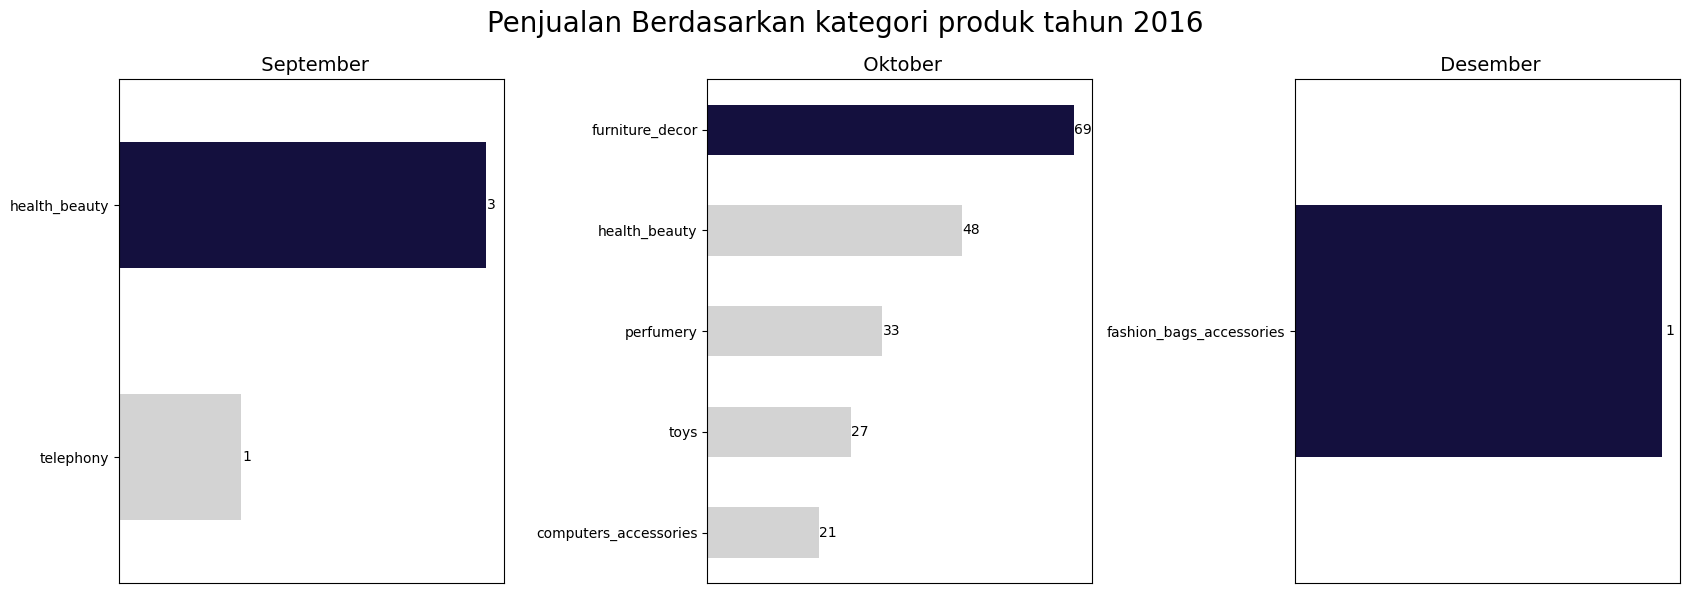

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 6))

# Data 2016
for i, (bulan, data) in enumerate(zip(
    ['September', 'Oktober', 'Desember'],
    [tren_pesanan_2016_bulan_9, tren_pesanan_2016_bulan_10, tren_pesanan_2016_bulan_12]
)):
    # top 5 kategori paling laris
    top_5 = data[data['total_orders'] > 0].nlargest(5, 'total_orders')

    # Warna Bar
    max_value = top_5['total_orders'].max()
    colors = ['#0E0846' if x == max_value else '#D3D3D3' for x in top_5['total_orders']]

    # Bar plot
    sns.barplot(
        data=top_5,
        x='total_orders',
        y='product_category',
        ax=ax[i],
        hue='product_category',
        palette=colors,
        legend=False,
        width=0.5
    )

    # label
    for bar in ax[i].patches:
        ax[i].text(
            bar.get_width() + 0.01,
            bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():,.0f}',
            ha='left',
            va='center',
            fontsize=10,
            color='black'
        )


    ax[i].set_title(f' {bulan}', fontsize=14)
    ax[i].set_xticks([])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y', labelsize=10)
plt.suptitle("Penjualan Berdasarkan kategori produk tahun 2016", fontsize=20)
plt.tight_layout()
plt.show()


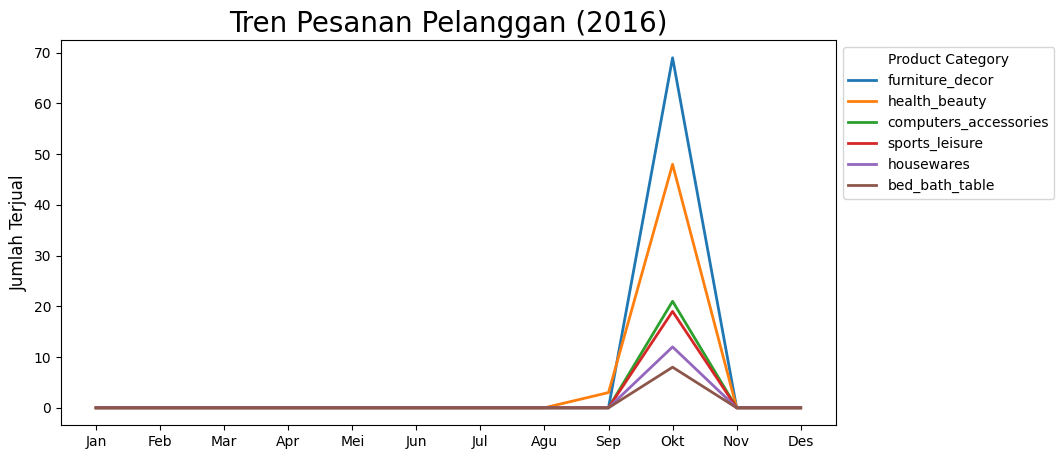

In [ ]:
plt.figure(figsize=(10, 5))

# Lineplot
sns.lineplot(
    data=tren_2016,
    x="month",
    y="total_orders",
    hue="product_category",
    linewidth=2,
    palette="tab10"
)

plt.title("Tren Pesanan Pelanggan (2016)", loc="center", fontsize=20)
plt.ylabel("Jumlah Terjual", fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Product Category", fontsize=10, loc="upper left", bbox_to_anchor=(1,1))
plt.show()


Sepanjang tahun **2016**, jumlah transaksi mengalami fluktuasi setiap bulan. **Puncak penjualan terjadi pada bulan Oktober**, dengan kategori **furniture_decor** sebagai produk yang **paling banyak dipesan**. Namun, terjadi **penurunan** drastis dari bulan **November ke Desember**, dimana tidak ada transaksi yang tercatat pada bulan November, dan hanya satu transaksi yang terjadi pada bulan Desember

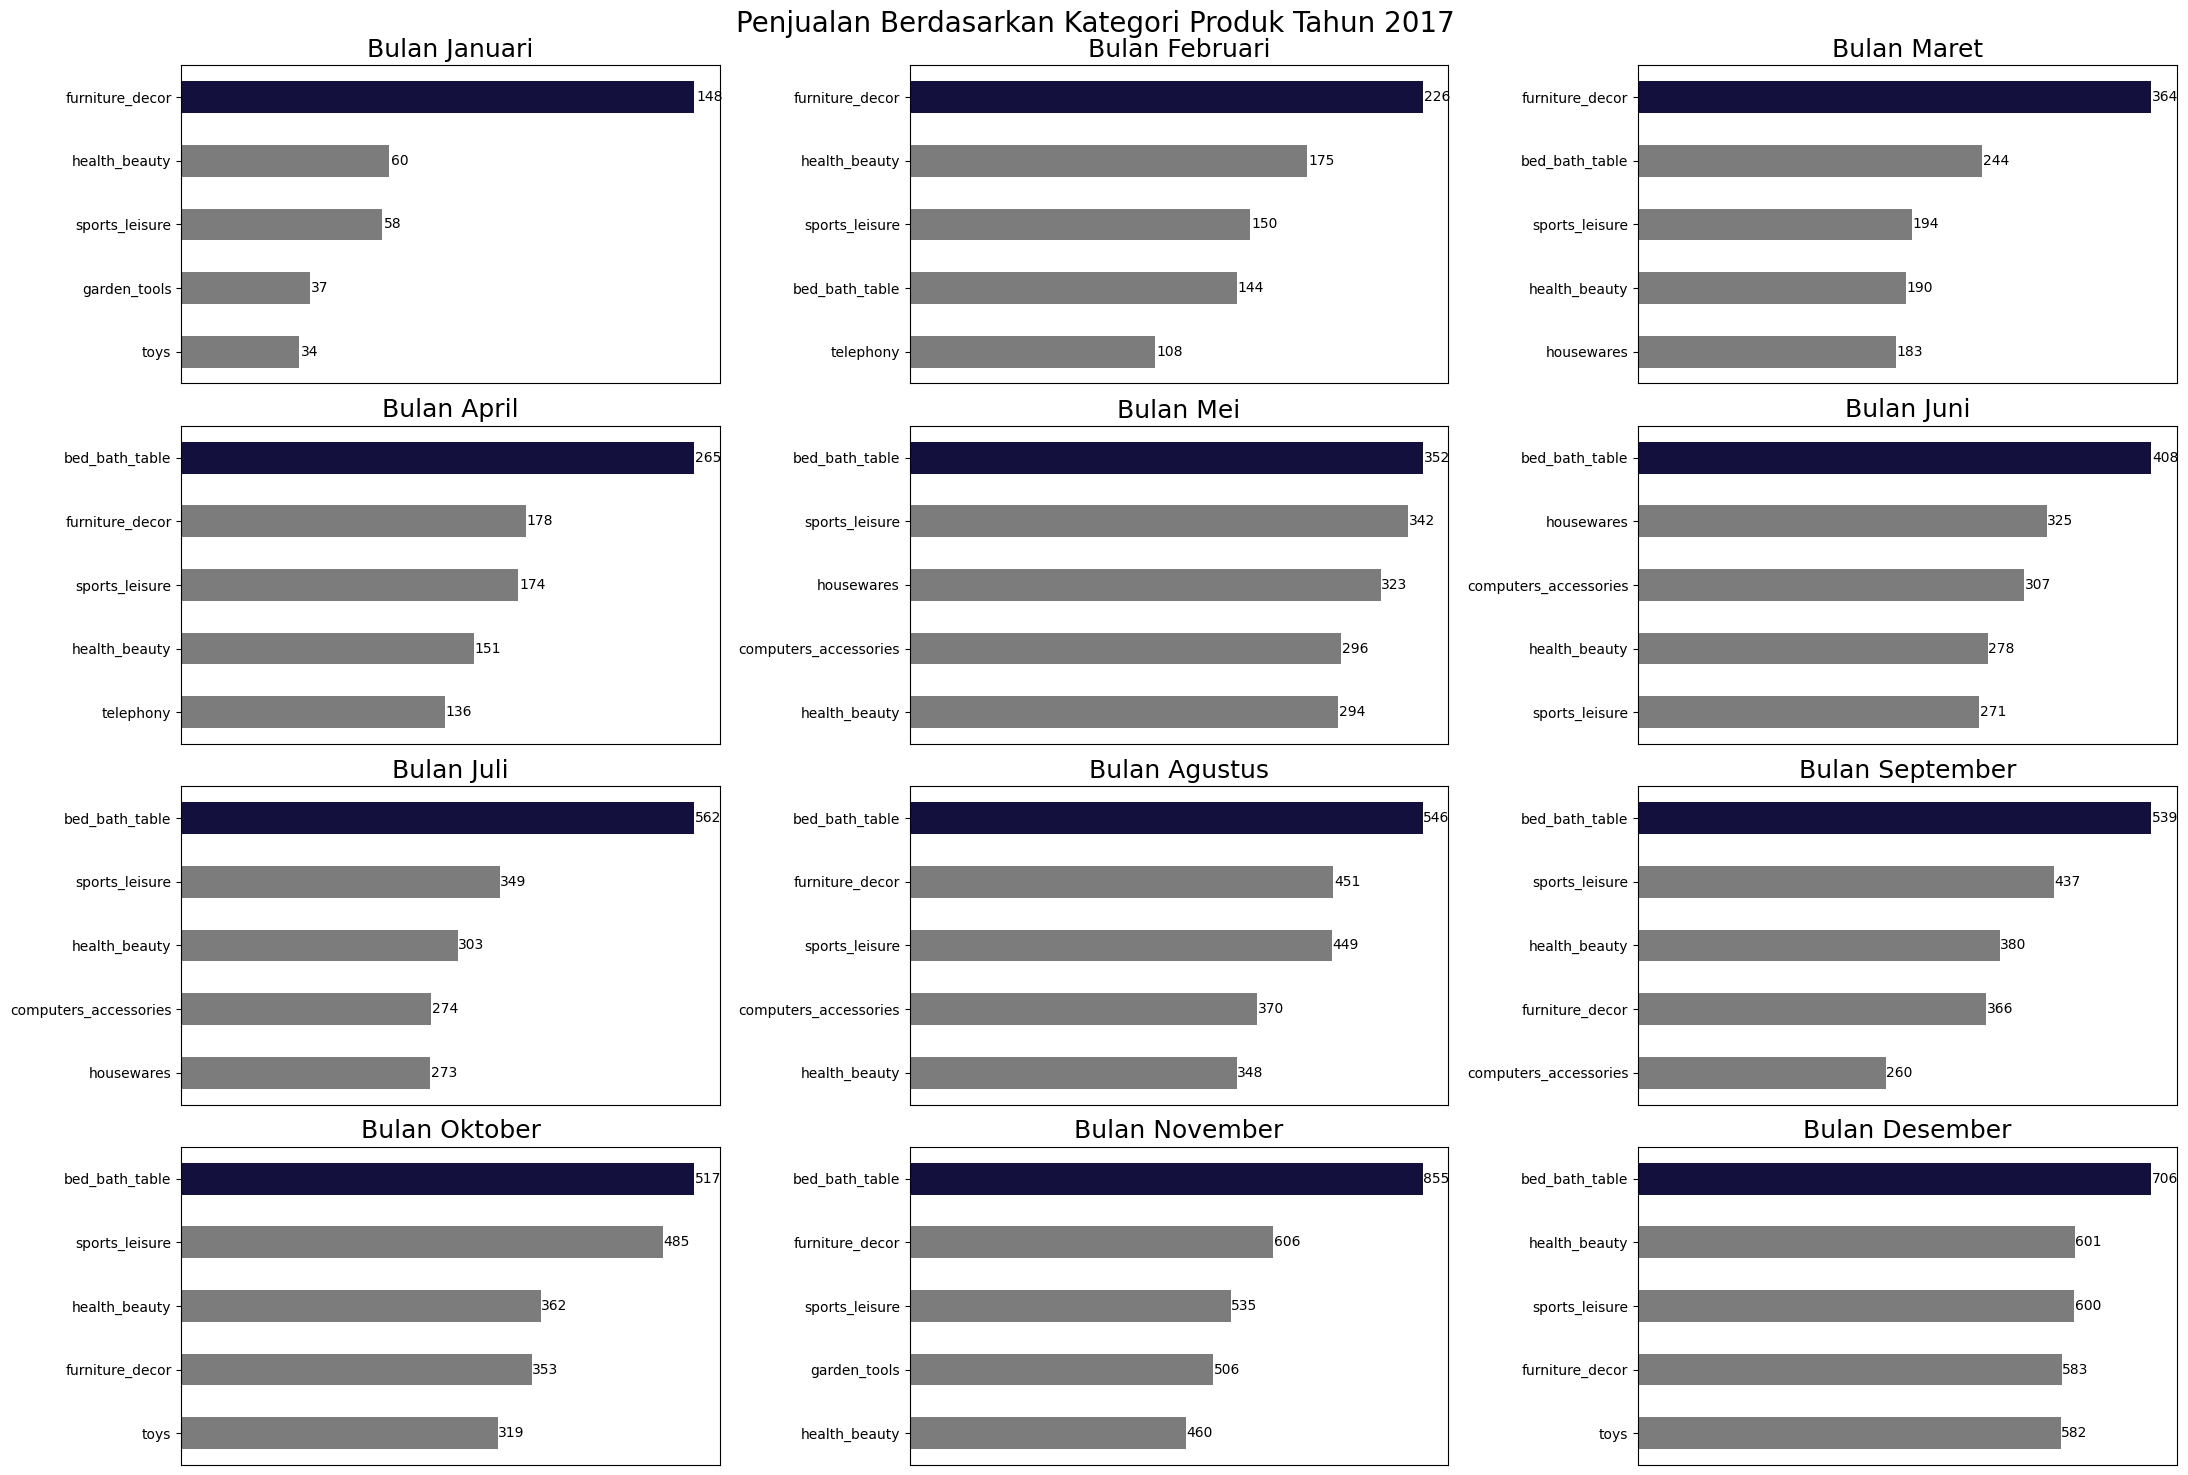

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(22, 15))
ax = ax.flatten()
# data 2017
bulan_list = ['Januari', 'Februari', 'Maret', 'April','Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
data_list = [tren_pesanan_2017_bulan_1, tren_pesanan_2017_bulan_2, tren_pesanan_2017_bulan_3, tren_pesanan_2017_bulan_4, tren_pesanan_2017_bulan_5, tren_pesanan_2017_bulan_6, tren_pesanan_2017_bulan_7, tren_pesanan_2017_bulan_8, tren_pesanan_2017_bulan_9, tren_pesanan_2017_bulan_10, tren_pesanan_2017_bulan_11, tren_pesanan_2017_bulan_12]

for i, (bulan, data) in enumerate(zip(bulan_list, data_list)):
    # top 5 kategori paling laris
    top5 = data[data['total_orders'] > 0].nlargest(5, 'total_orders')


    # Warna Bar
    max_value = top5['total_orders'].max()
    colors = ['#0E0846' if x == max_value else '#7C7C7C' for x in top5['total_orders']]

    # Bar plot
    sns.barplot(
    data=top5,
    x='total_orders',
    y='product_category',
    ax=ax[i],
    hue='product_category',
    palette=colors,
    legend=False,
    width=0.5,
    err_kws={'linewidth': 5}
)
    # label
    for bar in ax[i].patches:
        ax[i].text(
            bar.get_width() + 0.5,
            bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():,.0f}',
            ha='left',
            va='center',
            fontsize=10,
            color='black'
        )
    ax[i].set_title(f'Bulan {bulan}', fontsize=18)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticks([])
    ax[i].tick_params(axis='y', labelsize=10)
plt.suptitle("Penjualan Berdasarkan Kategori Produk Tahun 2017", fontsize=20)
plt.tight_layout()
plt.show()


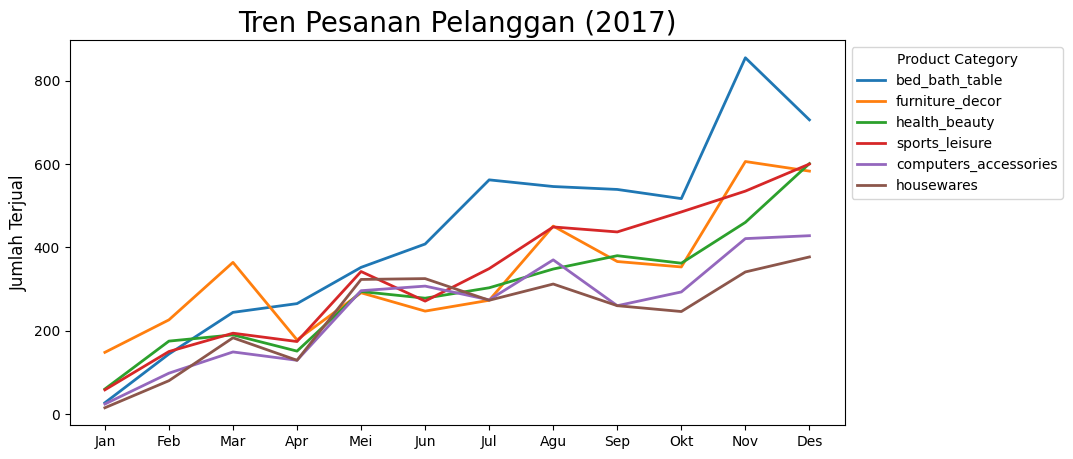

In [ ]:
plt.figure(figsize=(10, 5))

# Lineplot
sns.lineplot(
    data=tren_2017,
    x="month",
    y="total_orders",
    hue="product_category",
    linewidth=2,
    palette="tab10"
)

plt.title("Tren Pesanan Pelanggan (2017)", loc="center", fontsize=20)
plt.ylabel("Jumlah Terjual", fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Product Category", fontsize=10, loc="upper left", bbox_to_anchor=(1,1))
plt.show()


Pada tahun **2017**, terjadi **peningkatan penjualan** dibandingkan tahun 2016, dengan transaksi yang tercatat sepanjang tahun. Setiap bulan menunjukkan pola penjualan yang berbeda, dengan kategori **furniture_decor dan bed_bath_table** sebagai dua produk yang **paling banyak dibeli**. Kategori furniture_decor mendominasi sebagai produk terlaris selama tiga bulan pertama (Januari hingga Maret), sedangkan bed_bath_table mengambil alih posisi teratas selama sembilan bulan berikutnya, dari April hingga Desember

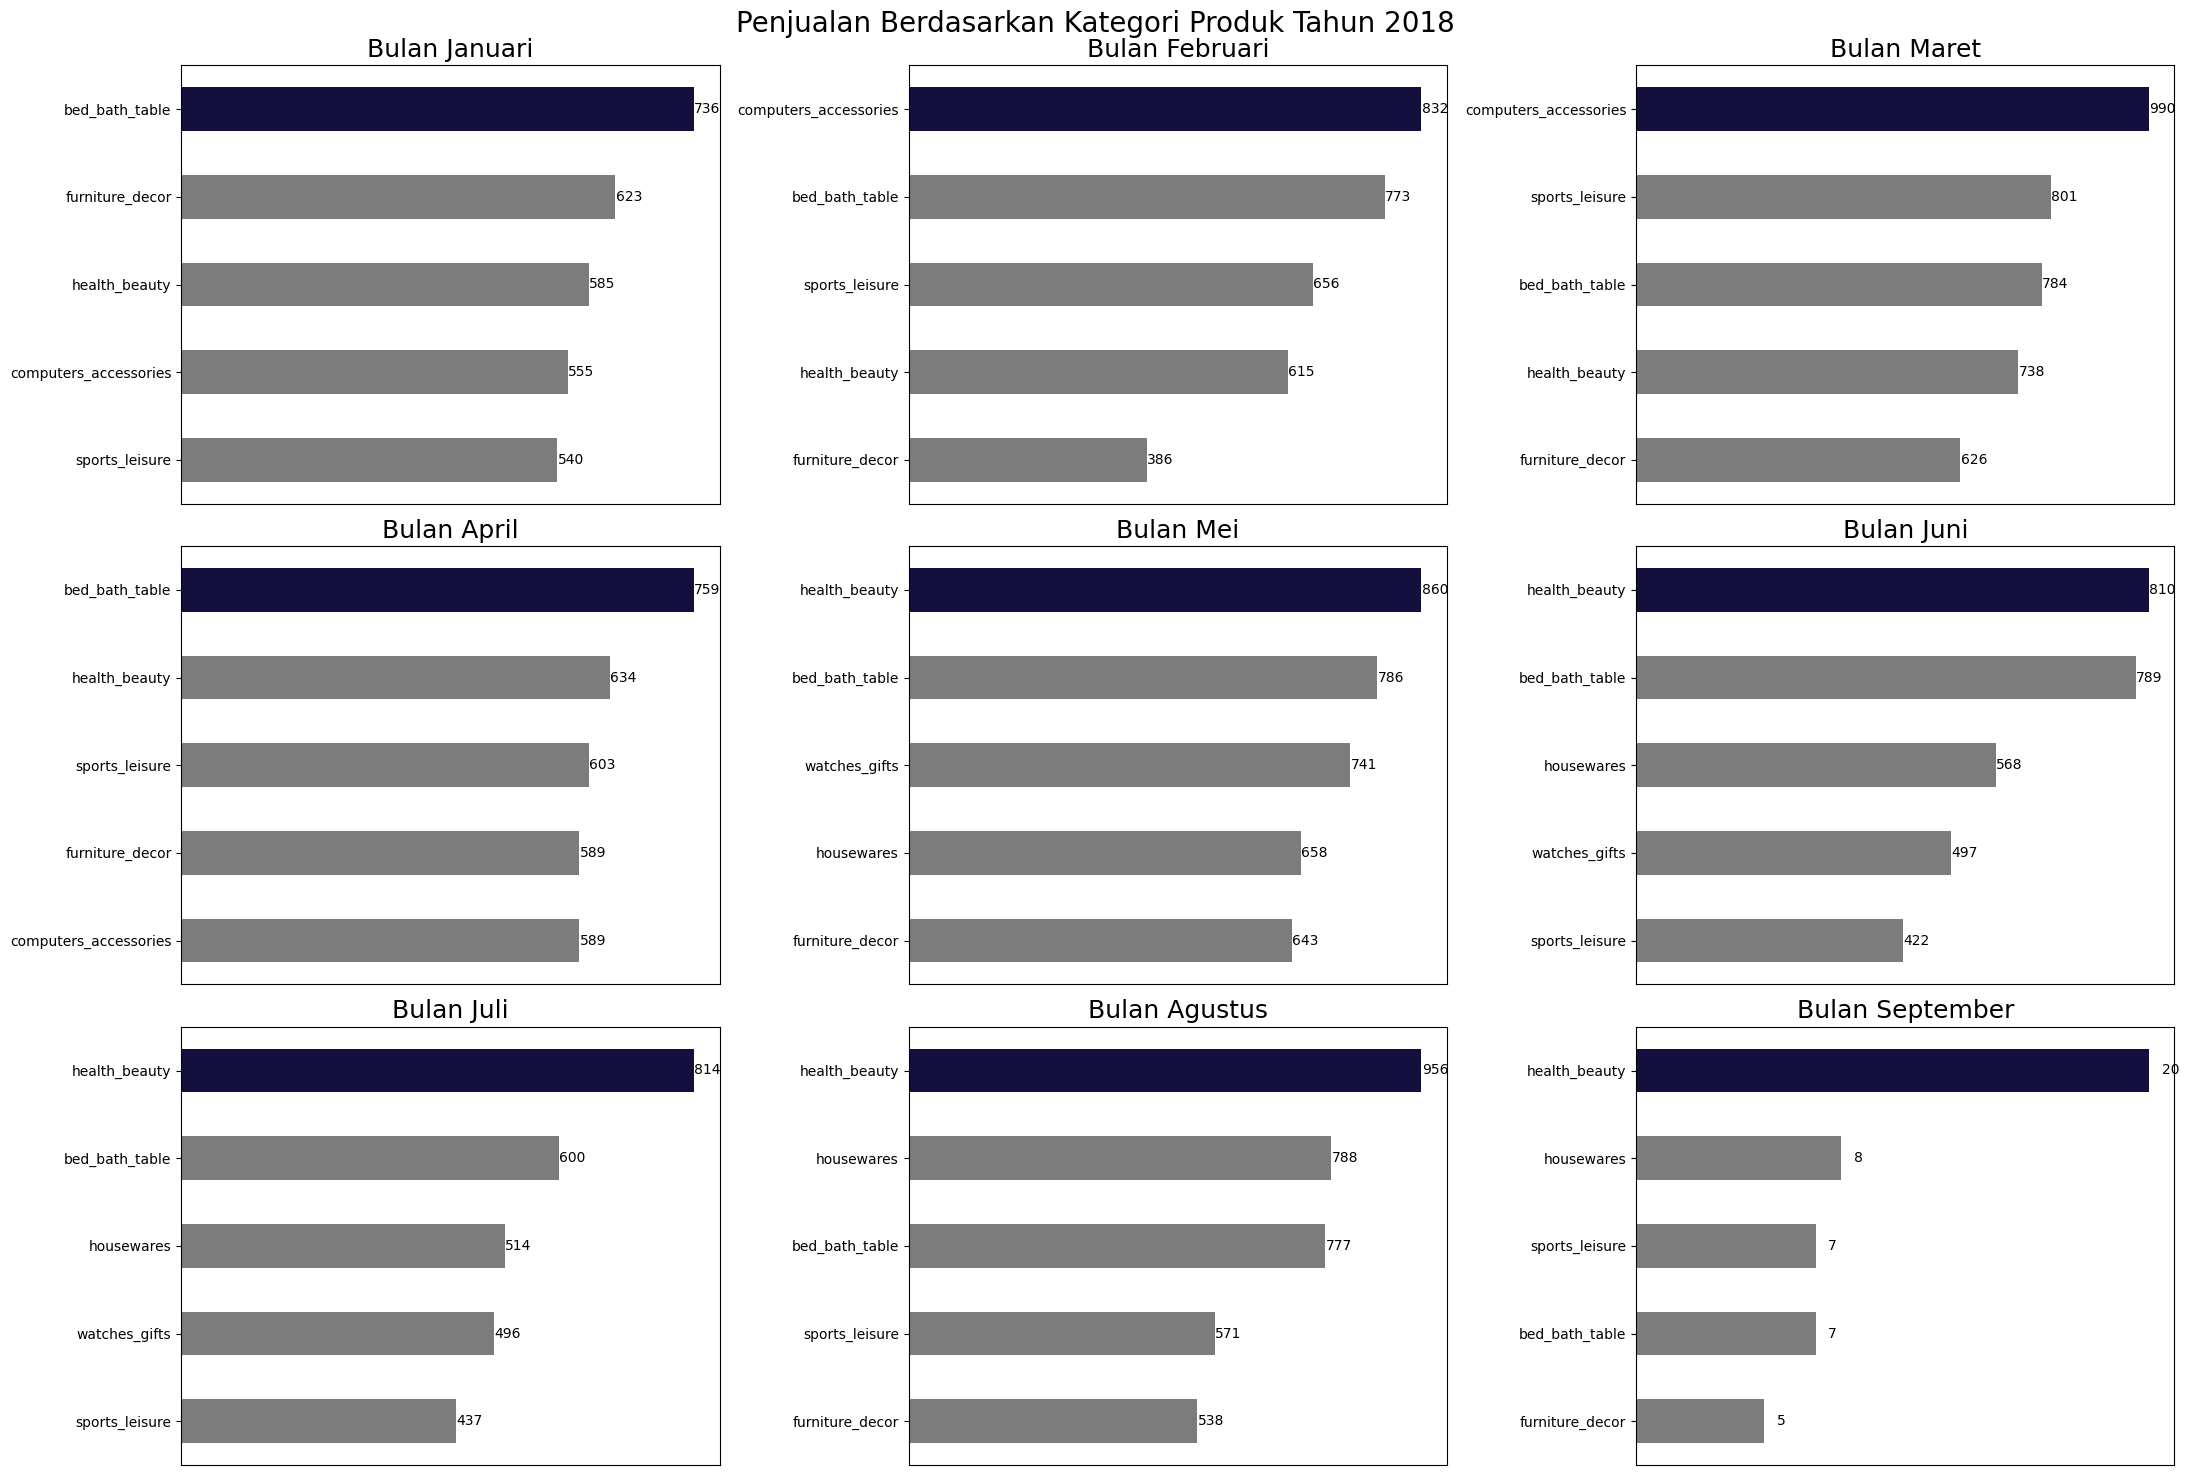

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(22, 15))
ax = ax.flatten()
# data 2017
bulan_list = ['Januari', 'Februari', 'Maret', 'April','Mei', 'Juni', 'Juli', 'Agustus', 'September']
data_list = [tren_pesanan_2018_bulan_1, tren_pesanan_2018_bulan_2, tren_pesanan_2018_bulan_3, tren_pesanan_2018_bulan_4, tren_pesanan_2018_bulan_5, tren_pesanan_2018_bulan_6, tren_pesanan_2018_bulan_7, tren_pesanan_2018_bulan_8, tren_pesanan_2018_bulan_9]

for i, (bulan, data) in enumerate(zip(bulan_list, data_list)):
    # top 5 kategori paling laris
    top5 = data[data['total_orders'] > 0].nlargest(5, 'total_orders')


    # Warna Bar
    max_value = top5['total_orders'].max()
    colors = ['#0E0846' if x == max_value else '#7C7C7C' for x in top5['total_orders']]

    # Bar plot
    sns.barplot(
    data=top5,
    x='total_orders',
    y='product_category',
    ax=ax[i],
    hue='product_category',
    palette=colors,
    legend=False,
    width=0.5,
    err_kws={'linewidth': 5}
)
    # label
    for bar in ax[i].patches:
        ax[i].text(
            bar.get_width() + 0.5,
            bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():,.0f}',
            ha='left',
            va='center',
            fontsize=10,
            color='black'
        )
    ax[i].set_title(f'Bulan {bulan}', fontsize=18)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticks([])
    ax[i].tick_params(axis='y', labelsize=10)
plt.suptitle("Penjualan Berdasarkan Kategori Produk Tahun 2018", fontsize=20)
plt.tight_layout()
plt.show()


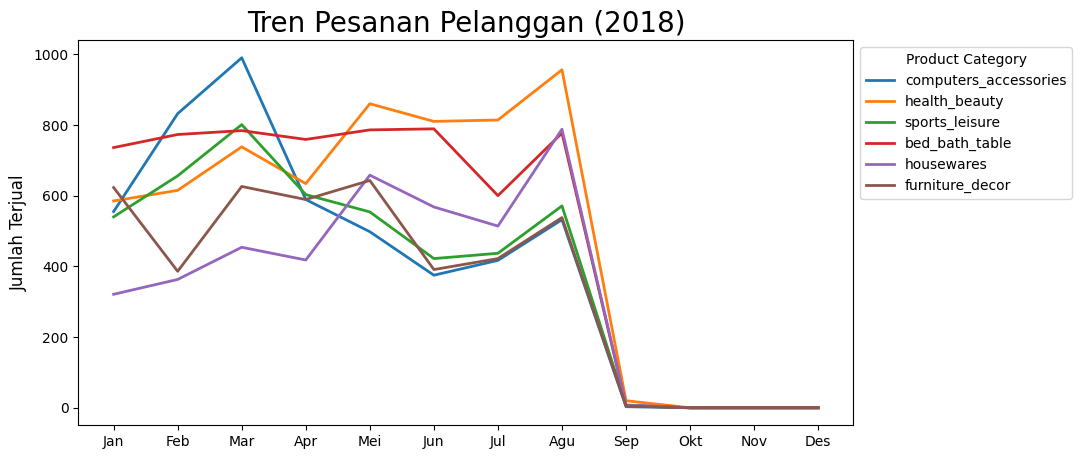

In [ ]:
plt.figure(figsize=(10, 5))

# Lineplot
sns.lineplot(
    data=tren_2018,
    x="month",
    y="total_orders",
    hue="product_category",
    linewidth=2,
    palette="tab10"
)

plt.title("Tren Pesanan Pelanggan (2018)", loc="center", fontsize=20)
plt.ylabel("Jumlah Terjual", fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Product Category", fontsize=10, loc="upper left", bbox_to_anchor=(1,1))
plt.show()


Pada tahun **2018**, penjualan masih berlangsung secara signifikan, namun hanya terdapat data selama sembilan bulan, dari Januari hingga September. Tahun ini menunjukkan perubahan dalam minat pemesanan dengan tiga kategori produk utama yang p**aling diminati**: **bed_bath_table, computer_accessories, dan health_beauty**.

Kategori bed_bath_table masih mendominasi sebagai produk terlaris pada bulan Januari. Namun, pada Februari hingga Maret, computer_accessories mengambil alih posisi teratas. Tren kembali berubah pada April, di mana bed_bath_table kembali menjadi kategori paling laris. Selanjutnya, dari Mei hingga September, health_beauty menjadi kategori dengan jumlah pesanan tertinggi.

Pada bulan September, terjadi penurunan pesanan yang sangat drastis. Jika pada bulan sebelumnya jumlah pesanan mencapai 10.713, angka ini merosot tajam hingga hanya tersisa 147 pesanan. Sementara itu, tidak terdapat catatan transaksi untuk tiga bulan terakhir tahun 2018.

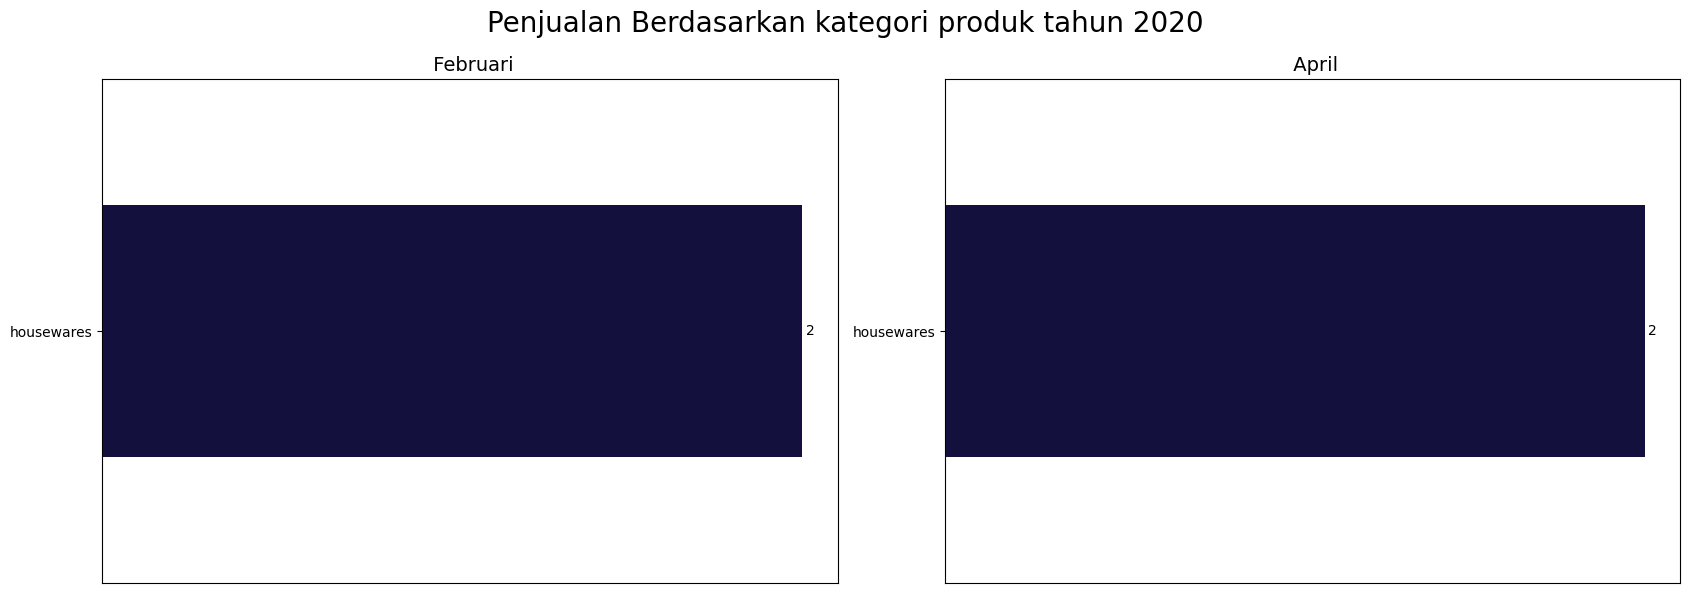

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

# Data 2016
for i, (bulan, data) in enumerate(zip(
    ['Februari', 'April'],
    [tren_pesanan_2020_bulan_2, tren_pesanan_2020_bulan_4]
)):
    # top 5 kategori paling laris
    top_5 = data[data['total_orders'] > 0].nlargest(5, 'total_orders')

    # Warna Bar
    max_value = top_5['total_orders'].max()
    colors = ['#0E0846' if x == max_value else '#D3D3D3' for x in top_5['total_orders']]

    # Bar plot
    sns.barplot(
        data=top_5,
        x='total_orders',
        y='product_category',
        ax=ax[i],
        hue='product_category',
        palette=colors,
        legend=False,
        width=0.5
    )

    # label
    for bar in ax[i].patches:
        ax[i].text(
            bar.get_width() + 0.01,
            bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():,.0f}',
            ha='left',
            va='center',
            fontsize=10,
            color='black'
        )


    ax[i].set_title(f' {bulan}', fontsize=14)
    ax[i].set_xticks([])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='y', labelsize=10)
plt.suptitle("Penjualan Berdasarkan kategori produk tahun 2020", fontsize=20)
plt.tight_layout()
plt.show()


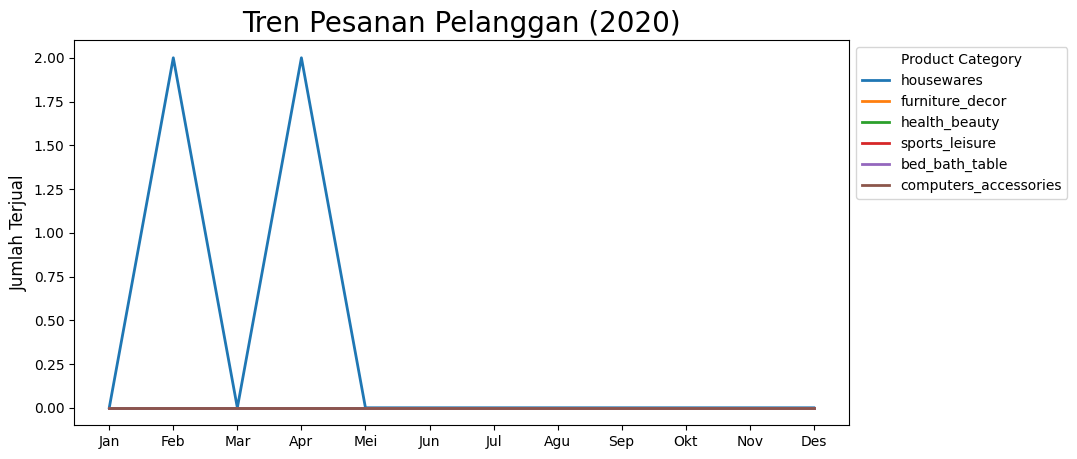

In [ ]:
plt.figure(figsize=(10, 5))

# Lineplot
sns.lineplot(
    data=tren_2020,
    x="month",
    y="total_orders",
    hue="product_category",
    linewidth=2,
    palette="tab10"
)

plt.title("Tren Pesanan Pelanggan (2020)", loc="center", fontsize=20)
plt.ylabel("Jumlah Terjual", fontsize=12)
plt.xlabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Product Category", fontsize=10, loc="upper left", bbox_to_anchor=(1,1))
plt.show()


 Tidak terdapat data transaksi untuk tahun 2019, dan pada tahun **2020** terjadi **penurunan penjualan yang sangat drastis**. Dari data yang tersedia, hanya **kategori housewares** yang masih tercatat memiliki transaksi, dengan jumlah yang **sangat minim**, yaitu **hanya dua** pesanan pada bulan Februari dan April.

**Insight** <br>
Berdasarkan analisis tren selama 4 tahun, ditemukan pola yang konsisten dalam minat pelanggan terhadap kategori produk tertentu. Dari visualisasi tren minat, terdapat 6 kategori utama yang selalu mendominasi penjualan setiap bulan dan muncul setiap tahun, yaitu:

1. health_beauty
2. furniture_decor
3. sports_leisure
4. computers_accessories
5. bed_bath_table
6. housewares

Pola ini menunjukkan bahwa pelanggan memiliki preferensi yang stabil terhadap kategori-kategori ini, sehingga dapat dijadikan dasar strategi pemasaran yang lebih tepat sasaran. Misalnya, strategi promosi musiman atau personalisasi penawaran dapat difokuskan pada kategori ini untuk meningkatkan penjualan lebih lanjut.



Setelah mengetahui produk yang paling banyak diminati, langkah selanjutnya adalah menganalisis pertumbuhannya. karena, popularitas suatu produk belum tentu mencerminkan profitabilitas atau pertumbuhan yang stabil. Oleh karena itu, perlu untuk menghitung growth rate (tingkat pertumbuhan) untuk mengidentifikasi produk mana yang benar-benar mengalami peningkatan permintaan secara konsisten. Hal ini berguna untuk memahami tren positif suatu produk dan mengetahui bagaimana strategi pemasaran yang tepat untuk mengoptimalkan penjualannya.

In [ ]:
# growth rate health_beauty
growth_health_beauty_2016 = tren_2016[(tren_2016['product_category'] == 'health_beauty') & (tren_2016['total_orders'] != 0)]
growth_health_beauty_2017 = tren_2017[(tren_2017['product_category'] == 'health_beauty') & (tren_2017['total_orders'] != 0)]
growth_health_beauty_2018 = tren_2018[(tren_2018['product_category'] == 'health_beauty') & (tren_2018['total_orders'] != 0)]
growth_health_beauty_2020 = tren_2020[(tren_2020['product_category'] == 'health_beauty') & (tren_2020['total_orders'] != 0)]

growth_health_beauty = pd.concat([
    growth_health_beauty_2016,
    growth_health_beauty_2017,
    growth_health_beauty_2018,
    growth_health_beauty_2020
], ignore_index=True)

bulan_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'Mei': 5, 'Jun': 6,
    'Jul': 7, 'Agu': 8, 'Sep': 9, 'Okt': 10, 'Nov': 11, 'Des': 12
}

growth_health_beauty['month_num'] = growth_health_beauty['month'].map(bulan_mapping)
growth_health_beauty = growth_health_beauty.sort_values(by=['year', 'month_num']).reset_index(drop=True)
growth_health_beauty.drop('month_num', axis=1, inplace=True)
growth_health_beauty["growth_rate"] = growth_health_beauty["total_orders"].pct_change() * 100
growth_health_beauty


,year,month,product_category,total_orders,growth_rate
0,2016,Sep,health_beauty,3,NaN
1,2016,Okt,health_beauty,48,1500.000000
2,2017,Jan,health_beauty,60,25.000000
3,2017,Feb,health_beauty,175,191.666667
4,2017,Mar,health_beauty,190,8.571429
5,2017,Apr,health_beauty,151,-20.526316
6,2017,Mei,health_beauty,294,94.701987
7,2017,Jun,health_beauty,278,-5.442177
8,2017,Jul,health_beauty,303,8.992806
9,2017,Agu,health_beauty,348,14.851485


In [ ]:
# growth furniture_decor
growth_furniture_decor_2016 = tren_2016[(tren_2016['product_category'] == 'furniture_decor') & (tren_2016['total_orders'] != 0)]
growth_furniture_decor_2017 = tren_2017[(tren_2017['product_category'] == 'furniture_decor') & (tren_2017['total_orders'] != 0)]
growth_furniture_decor_2018 = tren_2018[(tren_2018['product_category'] == 'furniture_decor') & (tren_2018['total_orders'] != 0)]
growth_furniture_decor_2020 = tren_2020[(tren_2020['product_category'] == 'furniture_decor') & (tren_2020['total_orders'] != 0)]

growth_furniture_decor = pd.concat([
    growth_furniture_decor_2016,
    growth_furniture_decor_2017,
    growth_furniture_decor_2018,
    growth_furniture_decor_2020
], ignore_index=True)

growth_furniture_decor['month_num'] = growth_furniture_decor['month'].map(bulan_mapping)
growth_furniture_decor = growth_furniture_decor.sort_values(by=['year', 'month_num']).reset_index(drop=True)
growth_furniture_decor.drop('month_num', axis=1, inplace=True)
growth_furniture_decor["growth_rate"] = growth_furniture_decor["total_orders"].pct_change() * 100
growth_furniture_decor


,year,month,product_category,total_orders,growth_rate
0,2016,Okt,furniture_decor,69,NaN
1,2017,Jan,furniture_decor,148,114.492754
2,2017,Feb,furniture_decor,226,52.702703
3,2017,Mar,furniture_decor,364,61.061947
4,2017,Apr,furniture_decor,178,-51.098901
5,2017,Mei,furniture_decor,291,63.483146
6,2017,Jun,furniture_decor,247,-15.120275
7,2017,Jul,furniture_decor,273,10.526316
8,2017,Agu,furniture_decor,451,65.201465
9,2017,Sep,furniture_decor,366,-18.847007


In [ ]:
# growth sports_leisure
growth_sports_leisure_2016 = tren_2016[(tren_2016['product_category'] == 'sports_leisure') & (tren_2016['total_orders'] != 0)]
growth_sports_leisure_2017 = tren_2017[(tren_2017['product_category'] == 'sports_leisure') & (tren_2017['total_orders'] != 0)]
growth_sports_leisure_2018 = tren_2018[(tren_2018['product_category'] == 'sports_leisure') & (tren_2018['total_orders'] != 0)]
growth_sports_leisure_2020 = tren_2020[(tren_2020['product_category'] == 'sports_leisure') & (tren_2020['total_orders'] != 0)]

growth_sports_leisure = pd.concat([
    growth_sports_leisure_2016,
    growth_sports_leisure_2017,
    growth_sports_leisure_2018,
    growth_sports_leisure_2020
], ignore_index=True)

growth_sports_leisure['month_num'] = growth_sports_leisure['month'].map(bulan_mapping)
growth_sports_leisure = growth_sports_leisure.sort_values(by=['year', 'month_num']).reset_index(drop=True)
growth_sports_leisure.drop('month_num', axis=1, inplace=True)
growth_sports_leisure["growth_rate"] = growth_sports_leisure["total_orders"].pct_change() * 100
growth_sports_leisure


,year,month,product_category,total_orders,growth_rate
0,2016,Okt,sports_leisure,19,NaN
1,2017,Jan,sports_leisure,58,205.263158
2,2017,Feb,sports_leisure,150,158.620690
3,2017,Mar,sports_leisure,194,29.333333
4,2017,Apr,sports_leisure,174,-10.309278
5,2017,Mei,sports_leisure,342,96.551724
6,2017,Jun,sports_leisure,271,-20.760234
7,2017,Jul,sports_leisure,349,28.782288
8,2017,Agu,sports_leisure,449,28.653295
9,2017,Sep,sports_leisure,437,-2.672606


In [ ]:
# growth rate computers_accessories
growth_computers_accessories_2016 = tren_2016[(tren_2016['product_category'] == 'computers_accessories') & (tren_2016['total_orders'] != 0)]
growth_computers_accessories_2017 = tren_2017[(tren_2017['product_category'] == 'computers_accessories') & (tren_2017['total_orders'] != 0)]
growth_computers_accessories_2018 = tren_2018[(tren_2018['product_category'] == 'computers_accessories') & (tren_2018['total_orders'] != 0)]
growth_computers_accessories_2020 = tren_2020[(tren_2020['product_category'] == 'computers_accessories') & (tren_2020['total_orders'] != 0)]

growth_computers_accessories = pd.concat([
    growth_computers_accessories_2016,
    growth_computers_accessories_2017,
    growth_computers_accessories_2018,
    growth_computers_accessories_2020
], ignore_index=True)

growth_computers_accessories['month_num'] = growth_computers_accessories['month'].map(bulan_mapping)
growth_computers_accessories = growth_computers_accessories.sort_values(by=['year', 'month_num']).reset_index(drop=True)
growth_computers_accessories.drop('month_num', axis=1, inplace=True)
growth_computers_accessories["growth_rate"] = growth_computers_accessories["total_orders"].pct_change() * 100
growth_computers_accessories


,year,month,product_category,total_orders,growth_rate
0,2016,Okt,computers_accessories,21,NaN
1,2017,Jan,computers_accessories,24,14.285714
2,2017,Feb,computers_accessories,98,308.333333
3,2017,Mar,computers_accessories,149,52.040816
4,2017,Apr,computers_accessories,129,-13.422819
5,2017,Mei,computers_accessories,296,129.457364
6,2017,Jun,computers_accessories,307,3.716216
7,2017,Jul,computers_accessories,274,-10.749186
8,2017,Agu,computers_accessories,370,35.036496
9,2017,Sep,computers_accessories,260,-29.729730


In [ ]:
# growth rate bed_bath_table
growth_bed_bath_table_2016 = tren_2016[(tren_2016['product_category'] == 'bed_bath_table') & (tren_2016['total_orders'] != 0)]
growth_bed_bath_table_2017 = tren_2017[(tren_2017['product_category'] == 'bed_bath_table') & (tren_2017['total_orders'] != 0)]
growth_bed_bath_table_2018 = tren_2018[(tren_2018['product_category'] == 'bed_bath_table') & (tren_2018['total_orders'] != 0)]
growth_bed_bath_table_2020 = tren_2020[(tren_2020['product_category'] == 'bed_bath_table') & (tren_2020['total_orders'] != 0)]

growth_bed_bath_table = pd.concat([
    growth_bed_bath_table_2016,
    growth_bed_bath_table_2017,
    growth_bed_bath_table_2018,
    growth_bed_bath_table_2020
], ignore_index=True)

growth_bed_bath_table['month_num'] = growth_bed_bath_table['month'].map(bulan_mapping)
growth_bed_bath_table = growth_bed_bath_table.sort_values(by=['year', 'month_num']).reset_index(drop=True)
growth_bed_bath_table.drop('month_num', axis=1, inplace=True)
growth_bed_bath_table["growth_rate"] = growth_bed_bath_table["total_orders"].pct_change() * 100
growth_bed_bath_table


,year,month,product_category,total_orders,growth_rate
0,2016,Okt,bed_bath_table,8,NaN
1,2017,Jan,bed_bath_table,27,237.500000
2,2017,Feb,bed_bath_table,144,433.333333
3,2017,Mar,bed_bath_table,244,69.444444
4,2017,Apr,bed_bath_table,265,8.606557
5,2017,Mei,bed_bath_table,352,32.830189
6,2017,Jun,bed_bath_table,408,15.909091
7,2017,Jul,bed_bath_table,562,37.745098
8,2017,Agu,bed_bath_table,546,-2.846975
9,2017,Sep,bed_bath_table,539,-1.282051


In [ ]:
#  growth rate housewares
growth_housewares_2016 = tren_2016[(tren_2016['product_category'] == 'housewares') & (tren_2016['total_orders'] != 0)]
growth_housewares_2017 = tren_2017[(tren_2017['product_category'] == 'housewares') & (tren_2017['total_orders'] != 0)]
growth_housewares_2018 = tren_2018[(tren_2018['product_category'] == 'housewares') & (tren_2018['total_orders'] != 0)]
growth_housewares_2020 = tren_2020[(tren_2020['product_category'] == 'housewares') & (tren_2020['total_orders'] != 0)]

growth_housewares = pd.concat([
    growth_housewares_2016,
    growth_housewares_2017,
    growth_housewares_2018,
    growth_housewares_2020
], ignore_index=True)

growth_housewares['month_num'] = growth_housewares['month'].map(bulan_mapping)
growth_housewares = growth_housewares.sort_values(by=['year', 'month_num']).reset_index(drop=True)
growth_housewares.drop('month_num', axis=1, inplace=True)
growth_housewares["growth_rate"] = growth_housewares["total_orders"].pct_change() * 100
growth_housewares


,year,month,product_category,total_orders,growth_rate
0,2016,Okt,housewares,12,NaN
1,2017,Jan,housewares,15,25.000000
2,2017,Feb,housewares,80,433.333333
3,2017,Mar,housewares,183,128.750000
4,2017,Apr,housewares,129,-29.508197
5,2017,Mei,housewares,323,150.387597
6,2017,Jun,housewares,325,0.619195
7,2017,Jul,housewares,273,-16.000000
8,2017,Agu,housewares,312,14.285714
9,2017,Sep,housewares,260,-16.666667


In [ ]:
avg_growth_rate_health_beauty = growth_health_beauty["growth_rate"].mean()
avg_growth_rate_furniture_decor = growth_furniture_decor["growth_rate"].mean()
avg_growth_rate_sports_leisure = growth_sports_leisure["growth_rate"].mean()
avg_growth_rate_computers_accessories = growth_computers_accessories["growth_rate"].mean()
avg_growth_rate_bed_bath_table = growth_computers_accessories["growth_rate"].mean()
avg_growth_rate_housewares = growth_computers_accessories["growth_rate"].mean()

print(f'Rata-rata growth rate Health Beauty: {avg_growth_rate_health_beauty:.2f}%')
print(f'Rata-rata growth rate Furniture Decor: {avg_growth_rate_furniture_decor:.2f}%')
print(f'Rata-rata growth rate sports_leisure: {avg_growth_rate_sports_leisure:.2f}%')
print(f'Rata-rata growth rate computers_accessories: {avg_growth_rate_computers_accessories:.2f}%')
print(f'Rata-rata growth rate bed_bath_table: {avg_growth_rate_bed_bath_table:.2f}%')
print(f'Rata-rata growth rate housewares: {avg_growth_rate_housewares:.2f}%')


Rata-rata growth rate Health Beauty: 83.56%
Rata-rata growth rate Furniture Decor: 13.24%
Rata-rata growth rate sports_leisure: 21.87%
Rata-rata growth rate computers_accessories: 24.01%
Rata-rata growth rate bed_bath_table: 24.01%
Rata-rata growth rate housewares: 24.01%


**Insight** <br>
Berdasarkan analisis rata-rata growth rate, kategori health_beauty menunjukkan tingkat pertumbuhan tertinggi, yaitu 83.56%. Angka ini jauh lebih tinggi dibandingkan kategori lain, menunjukkan bahwa permintaan terhadap produk kesehatan dan kecantikan terus meningkat secara signifikan dari tahun ke tahun.

Sementara itu, kategori furniture_decor memiliki growth rate terendah di antara kategori yang dianalisis, yaitu 13.24%, yang menunjukkan pertumbuhan lebih lambat dibanding kategori lainnya.

Kategori lain seperti sports_leisure (21.87%), computers_accessories (24.01%), bed_bath_table (24.01%), dan housewares (24.01%) menunjukkan pertumbuhan yang cukup stabil, meskipun tidak seagresif health_beauty.

### Pertanyaan 2: Apakah pemberian voucher kepada pelanggan efektif dalam menarik lebih banyak pelanggan?

In [ ]:
pembayaran_2016 = data_pesanan_pembayaran[data_pesanan_pembayaran['year'] == 2016]
pembayaran_2017 = data_pesanan_pembayaran[data_pesanan_pembayaran['year'] == 2017]
pembayaran_2018 = data_pesanan_pembayaran[data_pesanan_pembayaran['year'] == 2018]
pembayaran_2020 = data_pesanan_pembayaran[data_pesanan_pembayaran['year'] == 2020]

In [ ]:
tren_pembayaran_2016 = pembayaran_2016.groupby(by= ['payment_type', 'month'])['order_id'].count().reset_index().rename(columns={'order_id': 'total_payment_method'})
tren_pembayaran_2017 = pembayaran_2017.groupby(by= ['payment_type', 'month'])['order_id'].count().reset_index().rename(columns={'order_id': 'total_payment_method'})
tren_pembayaran_2018 = pembayaran_2018.groupby(by= ['payment_type', 'month'])['order_id'].count().reset_index().rename(columns={'order_id': 'total_payment_method'})
tren_pembayaran_2020 = pembayaran_2020.groupby(by= ['payment_type', 'month'])['order_id'].count().reset_index().rename(columns={'order_id': 'total_payment_method'})



<ipython-input-118-0949992e5b03>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tren_pembayaran_2016 = pembayaran_2016.groupby(by= ['payment_type', 'month'])['order_id'].count().reset_index().rename(columns={'order_id': 'total_payment_method'})
<ipython-input-118-0949992e5b03>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tren_pembayaran_2017 = pembayaran_2017.groupby(by= ['payment_type', 'month'])['order_id'].count().reset_index().rename(columns={'order_id': 'total_payment_method'})
<ipython-input-118-0949992e5b03>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True

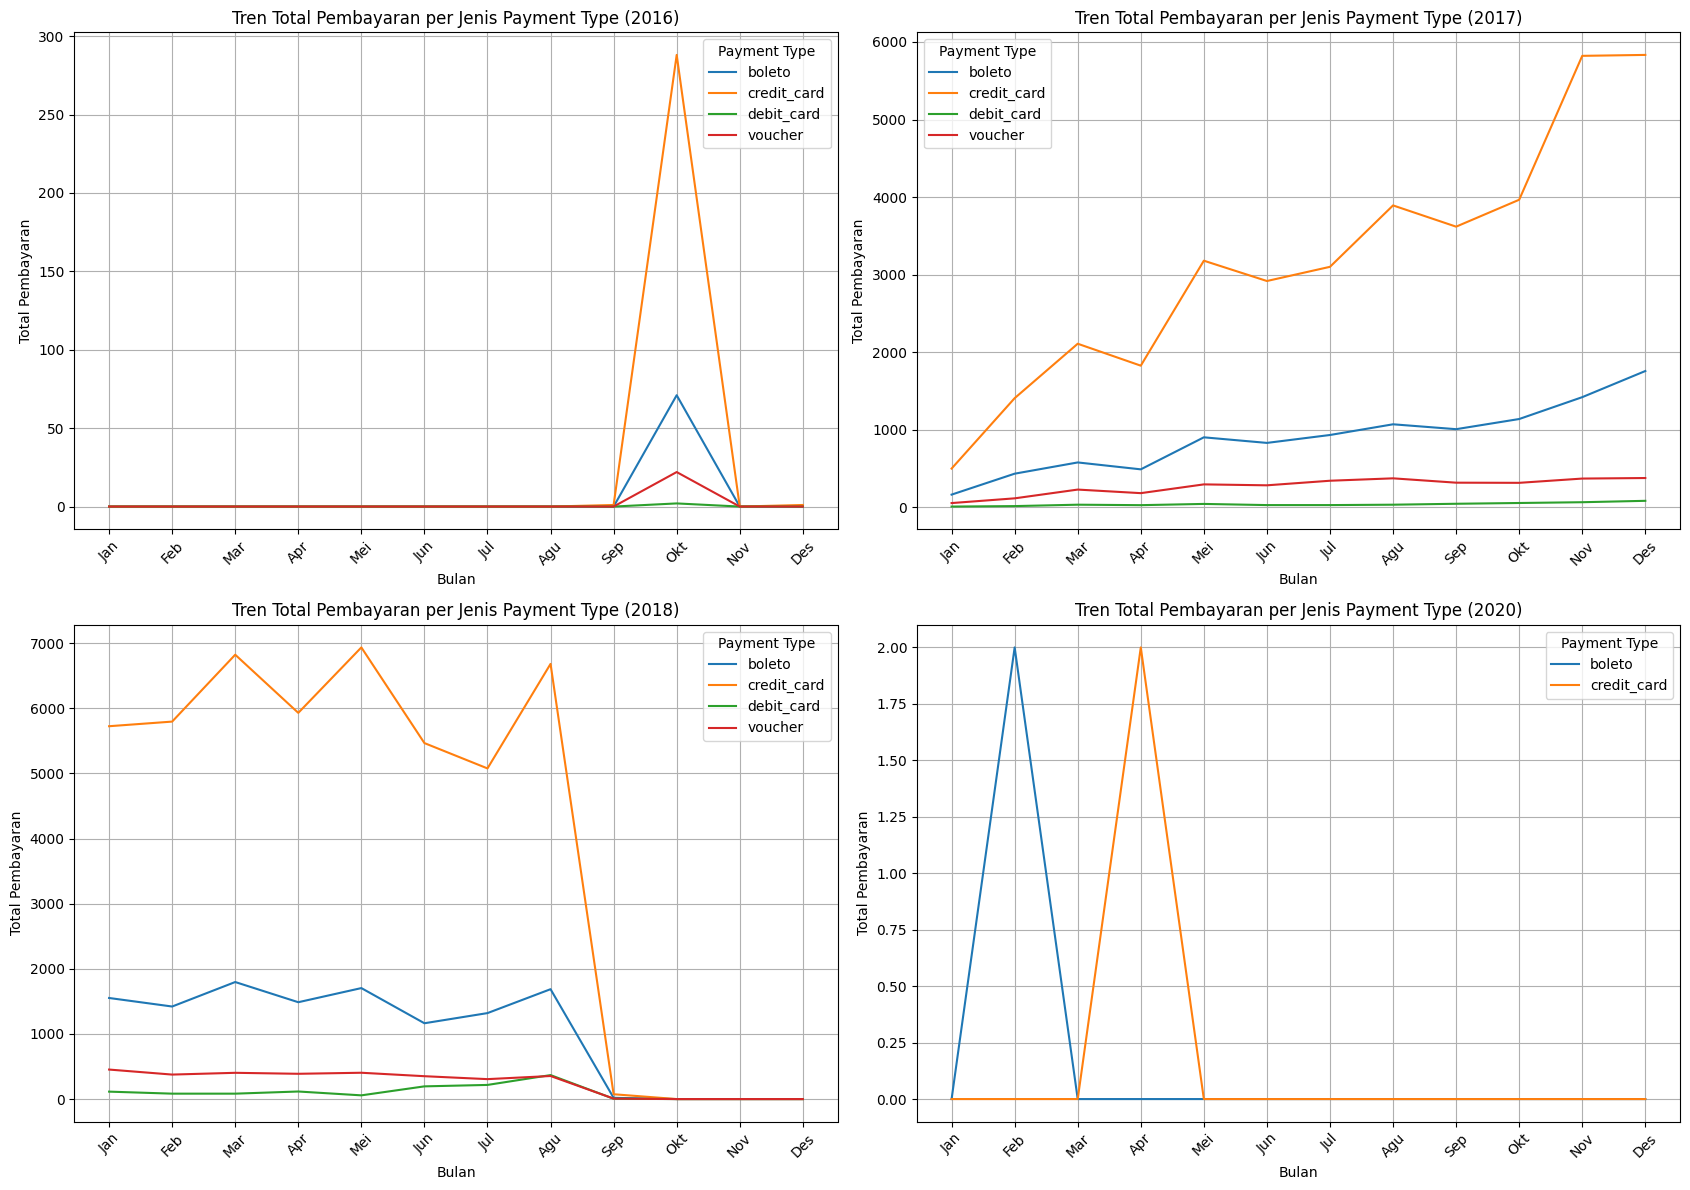

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(17, 12))

# Plot tahun 2016
sns.lineplot(ax=axes[0, 0], data=tren_pembayaran_2016, x="month", y="total_payment_method", hue="payment_type")
axes[0, 0].set_title("Tren Total Pembayaran per Jenis Payment Type (2016)")
axes[0, 0].set_xlabel("Bulan")
axes[0, 0].set_ylabel("Total Pembayaran")
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].legend(title="Payment Type")
axes[0, 0].grid()

# Plot tahun 2017
sns.lineplot(ax=axes[0, 1], data=tren_pembayaran_2017, x="month", y="total_payment_method", hue="payment_type")
axes[0, 1].set_title("Tren Total Pembayaran per Jenis Payment Type (2017)")
axes[0, 1].set_xlabel("Bulan")
axes[0, 1].set_ylabel("Total Pembayaran")
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].legend(title="Payment Type")
axes[0, 1].grid()

#
#   tahun 2018
sns.lineplot(ax=axes[1, 0], data=tren_pembayaran_2018, x="month", y="total_payment_method", hue="payment_type")
axes[1, 0].set_title("Tren Total Pembayaran per Jenis Payment Type (2018)")
axes[1, 0].set_xlabel("Bulan")
axes[1, 0].set_ylabel("Total Pembayaran")
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title="Payment Type")
axes[1, 0].grid()

sns.lineplot(ax=axes[1, 1], data=tren_pembayaran_2020, x="month", y="total_payment_method", hue="payment_type")
axes[1, 1].set_title("Tren Total Pembayaran per Jenis Payment Type (2020)")
axes[1, 1].set_xlabel("Bulan")
axes[1, 1].set_ylabel("Total Pembayaran")
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title="Payment Type")
axes[1, 1].grid()

plt.tight_layout()
plt.show()

**Insight :** <br>
Dapat dilihat bahwa penggunaan voucher sebagai metode pembayaran setiap tahunnya tergolong rendah, selalu menempati peringkat ketiga dari empat metode pembayaran yang tersedia. Hal ini menunjukkan bahwa pemberian voucher belanja tidak cukup menarik minat pelanggan secara signifikan. Sebaliknya, mayoritas pelanggan cenderung lebih memilih menggunakan kartu kredit sebagai metode pembayaran utama.

### Pertanyaan 3 : Apakah terdapat hubungan antara rating pelanggan dan harga produk yang dibeli?

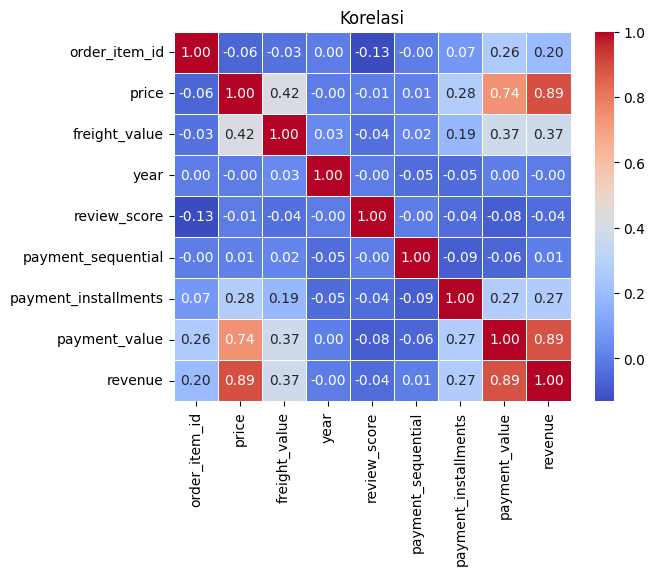

In [ ]:
# mencari korelasi antar kolom
korelasi = data_pesanan_pembayaran.corr(numeric_only=True)
sns.heatmap(korelasi, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi")
plt.show()

In [ ]:
korelasi

,order_item_id,price,freight_value,year,review_score,payment_sequential,payment_installments,payment_value,revenue
order_item_id,1.000000,-0.060506,-0.030627,0.000569,-0.130938,-0.002585,0.074293,0.264585,0.195928
price,-0.060506,1.000000,0.415714,-0.003303,-0.006119,0.006934,0.278024,0.739347,0.893272
freight_value,-0.030627,0.415714,1.000000,0.033612,-0.036654,0.023060,0.185776,0.373774,0.374158
year,0.000569,-0.003303,0.033612,1.000000,-0.004123,-0.046723,-0.050779,0.002423,-0.004123
review_score,-0.130938,-0.006119,-0.036654,-0.004123,1.000000,-0.001409,-0.044543,-0.083912,-0.044929
payment_sequential,-0.002585,0.006934,0.023060,-0.046723,-0.001409,1.000000,-0.085925,-0.064002,0.005428
payment_installments,0.074293,0.278024,0.185776,-0.050779,-0.044543,-0.085925,1.000000,0.274076,0.267297
payment_value,0.264585,0.739347,0.373774,0.002423,-0.083912,-0.064002,0.274076,1.000000,0.885190
revenue,0.195928,0.893272,0.374158,-0.004123,-0.044929,0.005428,0.267297,0.885190,1.000000


**Insight :** <br>
Berdasarkan analisis korelasi dalam tabel, dapat disimpulkan bahwa tidak terdapat hubungan yang signifikan antara rating pelanggan (review_score) dan harga produk (price) yang dibeli. Hal ini ditunjukkan oleh nilai korelasi yang sangat rendah antara kedua variabel tersebut (-0.006119), yang mengindikasikan hampir tidak ada hubungan linear di antara mereka. rating pelanggan juga tidak memiliki hubungan dari freight_value atau batas waktu pengiriman.

Selain itu, review_score juga memiliki korelasi yang rendah terhadap payment_value (-0.083912) dan revenue (-0.044929), yang menunjukkan bahwa rating pelanggan tidak banyak dipengaruhi oleh total pembayaran atau pendapatan yang dihasilkan dari pesanan.

## Analisis Lanjutan (Geospatial Analysis)

### Pertanyaan 4 : Bagaimana tren penjualan di berbagai daerah dari tahun ke tahun, dan daerah mana yang konsisten memiliki penjualan tertinggi?

In [ ]:
kota_pelanggan = lokasi_pelanggan.groupby('customer_city')['customer_unique_id'].count().reset_index().rename(columns={'customer_unique_id': 'customer_count'})
kota_penjual = lokasi_penjual.groupby('seller_city')['seller_id'].count().reset_index().rename(columns={'seller_id': 'seller_count'})

<ipython-input-152-468073f9a6b6>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-152-468073f9a6b6>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


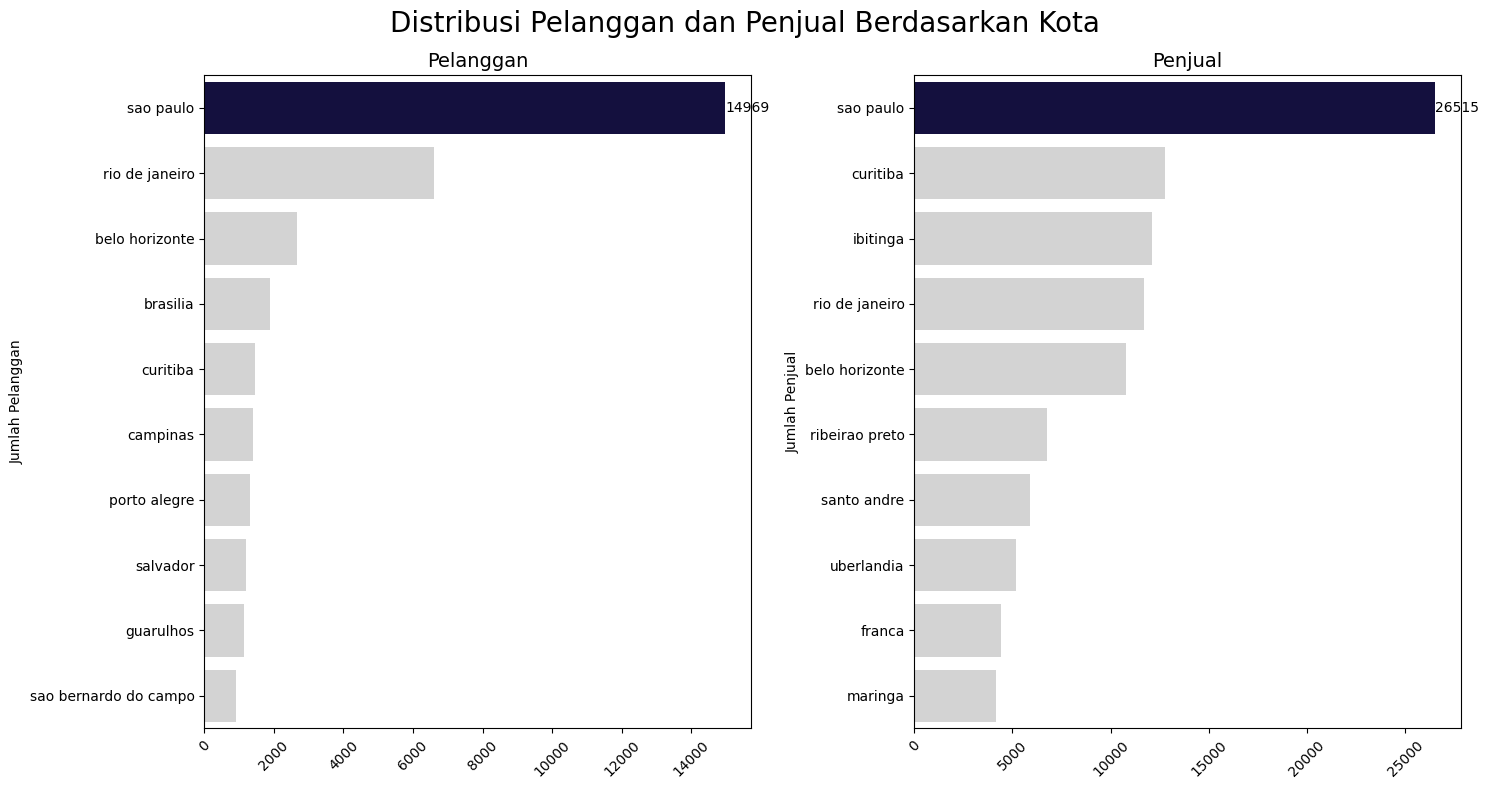

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

top_10_pelanggan = kota_pelanggan.nlargest(10, 'customer_count')
top_10_penjual = kota_penjual.nlargest(10, 'seller_count')

max_value_pelanggan = top_10_pelanggan['customer_count'].max()
colors_pelanggan = ['#0E0846' if x == max_value_pelanggan else '#D3D3D3' for x in top_10_pelanggan['customer_count']]

max_value_penjual = top_10_penjual['seller_count'].max()
colors_penjual = ['#0E0846' if x == max_value_penjual else '#D3D3D3' for x in top_10_penjual['seller_count']]

# Plot pelanggan
sns.barplot(
    data=top_10_pelanggan,
    x='customer_count',
    y='customer_city',
    ax=ax[0],
    palette=colors_pelanggan
)
for bar in ax[0].containers[0]:
    ax[0].text(
        bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}', ha='left', va='center', fontsize=10, color='black'
    )
ax[0].set_title('Pelanggan', fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylabel('Jumlah Pelanggan')
ax[0].tick_params(axis='x', rotation=45)

# Plot penjual
sns.barplot(
    data=top_10_penjual,
    x='seller_count',
    y='seller_city',
    ax=ax[1],
    palette=colors_penjual
)
for bar in ax[1].containers[0]:
    ax[1].text(
        bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}', ha='left', va='center', fontsize=10, color='black'
    )
ax[1].set_title('Penjual', fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylabel('Jumlah Penjual')
ax[1].tick_params(axis='x', rotation=45)

plt.suptitle("Distribusi Pelanggan dan Penjual Berdasarkan Kota", fontsize=20)
plt.tight_layout()
plt.show()


In [ ]:
#  koordinat tengah peta(Sao Paulo)
map = folium.Map(location=[-23.5505, -46.6333], zoom_start=10)

# marker pelanggan (biru)
for idx, row in lokasi_pelanggan.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=3,
        color='blue',
        fill=True,
        tooltip=f"Pelanggan: {row['customer_unique_id']}"
    ).add_to(map)

#  marker penjual (merah)
for idx, row in lokasi_penjual.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=5,
        color='red',
        fill=True,
        tooltip=f"Penjual: {row['seller_id']}"
    ).add_to(map)

map.save("penyebaran_pelanggan_penjual.html")

Visualisasi di bawah ini ditampilkan dalam bentuk screenshot karena jika dijalankan langsung di dalam notebook, proses load-nya memakan waktu yang lama. Oleh karena itu, hasil visualisasi telah disimpan dalam format HTML. Berikut saya lampirkan file HTML yang berisi peta interaktif yang menunjukkan persebaran penjual dan pelanggan berdasarkan lokasi geografis mereka

https://drive.google.com/file/d/1-3uA8hDBmi1YQxXUBrtnLubdpZuUX-Ij/view?usp=sharing

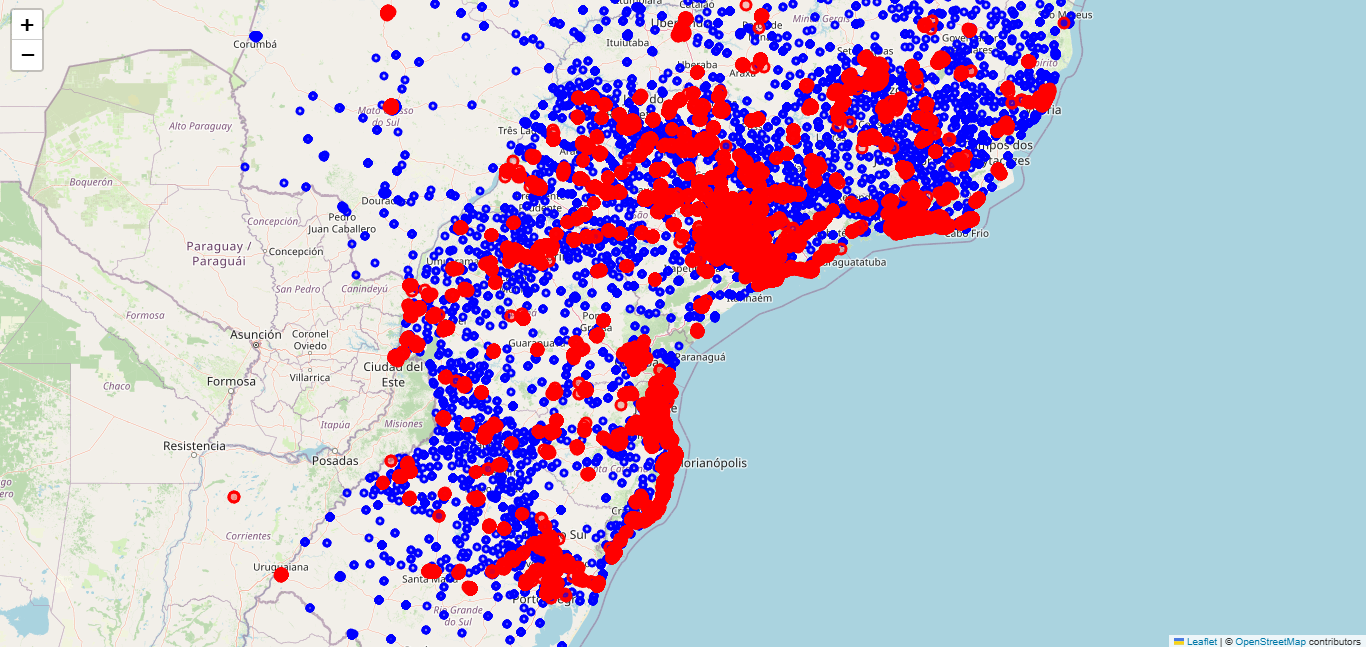

**Keterangan** <br>
 🔴 : Penjual <br>
 🔵 : pelanggan

**Insight :** <br>
Berdasarkan analisis data penjualan dari tahun ke tahun, dapat terlihat bahwa tren penjualan di berbagai daerah menunjukkan pola yang relatif stabil, dengan beberapa daerah mengalami peningkatan penjualan yang signifikan.

Secara konsisten, Sao Paulo merupakan daerah dengan jumlah pelanggan dan penjual terbanyak dibandingkan daerah lain. Data menunjukkan bahwa jumlah pelanggan di Sao Paulo mencapai 14.969, sementara jumlah penjual mencapai 26.515. Hal ini menunjukkan bahwa Sao Paulo adalah pusat utama aktivitas e-commerce, baik dari sisi pembeli maupun penjual.

## Conclusion

#### **Conclution pertanyaan 1**
Berdasarkan analisis tren penjualan selama 4 tahun, terdapat enam kategori produk yang secara konsisten mendominasi pasar, yaitu health_beauty, furniture_decor, sports_leisure, computers_accessories, bed_bath_table, dan housewares.

Namun, dari segi pertumbuhan, kategori health_beauty memiliki growth rate tertinggi (83.56%), menunjukkan peningkatan permintaan yang signifikan dari tahun ke tahun. Sebaliknya, furniture_decor memiliki growth rate terendah (13.24%), yang menunjukkan pertumbuhan lebih lambat dibandingkan kategori lainnya.

Kategori lainnya (sports_leisure, computers_accessories, bed_bath_table, dan Housewares) memiliki pertumbuhan yang stabil di kisaran 21.87% - 24.01%.

***Rekomendasi Strategi Pemasaran*** : *Fokus pada Kategori*  ***Health & Beauty (Growth Rate 83.56%)***
1. Strategi Influencer & KOL Marketing :
Menggandeng beauty influencer dan health expert untuk meningkatkan kredibilitas produk.
2. Flash Sale & Bundling :
Membuat promo paket atau diskon spesial
3 Gratis Ongkir: <br>
  - Kategori health_beauty memiliki growth rate tertinggi, yang berarti permintaan produk ini meningkat secara signifikan setiap tahun. Jika diterapkan gratis ongkir pada kategori ini, risiko kerugian lebih kecil
  - Gratis ongkir khusus wilayah dengan potensi pasar besar seperti Sao Paulo (berdasarkan data penjualan tertinggi).


#### **Conclution pertanyaan 2**
Berdasarkan analisis tren pembayaran, penggunaan voucher sebagai metode pembayaran masih tergolong rendah dan selalu menempati peringkat ketiga dari empat metode pembayaran yang tersedia setiap tahunnya. Hal ini menunjukkan bahwa pemberian voucher belanja tidak cukup efektif dalam menarik lebih banyak pelanggan dibandingkan metode pembayaran lain yang lebih sering digunakan.

***Rekomendasi Strategi Pemasaran :***
1. Karena produk Health & Beauty memiliki pertumbuhan tertinggi, voucher bisa lebih efektif jika diterapkan pada kategori ini.

### **Conclution pertanyaan 3**
Berdasarkan analisis korelasi, tidak terdapat hubungan yang signifikan antara rating pelanggan (review_score) dan harga produk (price). Nilai korelasi yang sangat rendah (-0.006119) menunjukkan bahwa pelanggan tidak memberikan rating berdasarkan harga produk.
Selain itu, rating pelanggan juga tidak berkorelasi dengan biaya pengiriman (freight_value) atau batas waktu pengiriman, yang berarti faktor-faktor tersebut bukanlah penentu utama dalam penilaian pelanggan terhadap produk.

***Rekomendasi Strategi Pemasaran :***
1. Fokus pada Kualitas Produk & Layanan, Bukan Harga : Karena harga tidak berpengaruh signifikan terhadap rating, maka meningkatkan kualitas produk dan layanan pelanggan adalah kunci utama.



### Conclution pertanyaan 4
Berdasarkan analisis tren penjualan dari tahun ke tahun, terlihat bahwa Sao Paulo secara konsisten menjadi daerah dengan penjualan tertinggi. Kota ini memiliki jumlah pelanggan dan penjual terbanyak dibandingkan daerah lain, dengan 14.969 pelanggan dan 26.515 penjual. Hal ini menunjukkan bahwa Sao Paulo adalah pusat utama aktivitas e-commerce.

***Rekomendasi Strategi Pemasaran :***
1. Fokus pada Sao Paulo sebagai Pasar Utama untuk meningkatkan loyalitas
